# Experiments with the "irrelevant noisy proxy" data set
This file contains experiments and plotting code for the third experiment in the paper. 

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cevaetools import *
from CEVAE import *
%load_ext autoreload
%autoreload 2

In [3]:
def rotated_linear_data_df(num_samples, c_x, c_t, c_yz, c_yt, s_x, s_t, s_y, rotation):
    """c are the structural parameters and s are the standard deviations of the error terms.
    For each x: z -c_x-> x+e_x
    For t: z -c_t-> t+e_t
    For y: z -c_yz-> y+e_y <-c_yt- t
    rotation is the rotation matrix that we add at the end for the proxy variables."""
    x_dim = len(c_x)
    z = np.random.standard_normal((num_samples,1))
    x = np.random.normal(np.tile(c_x, (num_samples,1))*z,
                         np.tile(s_x, (num_samples,1)),(num_samples, x_dim))
    x = x.dot(rotation.T)
    t = np.random.normal(np.tile(c_t, (num_samples,1))*z,
                         np.tile(s_t, (num_samples,1)),(num_samples, 1))
    y = np.random.normal(np.tile(c_yz, (num_samples,1))*z + np.tile(c_yt, (num_samples,1))*t,
                        np.tile(s_y, (num_samples,1)), (num_samples, 1))
    
    df = pd.DataFrame(np.concatenate([z,x,t,y], axis=1), 
                      columns=['z'] + ['x{}'.format(i) for i in range(x_dim)] + ['t','y'])
    return df

In [4]:
#Define the data generating process
c_x = np.array([1,2,0])
s_x = np.array([0.5,0.7,20])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])
alpha = 45/180*np.pi
beta = -45/180*np.pi
gamma = 45/180*np.pi
rotation = np.array([[np.cos(alpha), -np.sin(alpha),0],[np.sin(alpha),np.cos(alpha),0],[0,0,1]])\
            .dot(np.array([[np.cos(beta), 0, np.sin(beta)],[0,1,0],[-np.sin(beta),0,np.cos(beta)]]))\
            .dot(np.array([[1,0,0],[0,np.cos(gamma), -np.sin(gamma)],[0,np.sin(gamma),np.cos(gamma)]]))

# Run experiment with zdim=1

In [5]:
main_folder="rotated_data"

In [6]:
# Generate data sets
sub_folder_data = "samplesize500to20000"
datasize = [500,1000,2000,5000,10000,15000,20000]
dataparameters = [[sample_size, c_x, c_t, c_yz, c_yt, s_x, s_t, s_y,rotation] for sample_size in datasize]
generate_df = rotated_linear_data_df
param_times=10
data_labels = list(map(str,datasize))
repeat = False

In [7]:
dfs, datasets = create_dfs_datasets(generate_df, dataparameters, param_times, repeat, main_folder, sub_folder_data, data_labels)

In [8]:
dfs, datasets = load_dfs(main_folder, sub_folder_data, param_times)

In [9]:
BATCH_SIZE = 200
track_function = lambda model: estimate_AID_lineardata(model, c_yt, c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=1000)[0]
true_value = c_yt
device = 'cpu'

num_epochs=300
lr_start=0.01
lr_end=0.001
x_dim=3
z_dim=1
x_mode=np.array([0]*x_dim)
t_mode=0
y_mode=0
ty_separate_enc=False
z_mode=0
common_stds = False

p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30

param_times = 10

x_loss_scaling=1

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "NNzdim1500to20000"
labels = data_labels

Creation of the directory './data/rotated_data/NNzdim1500to20000/ failed. Trying to empty the same folder.


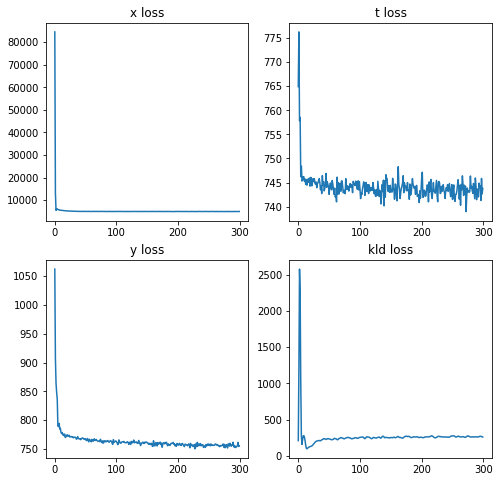

Total loss in the end:  6737.3070068359375
Estimated causal effect: 0.20821306179685936 true value: [1]


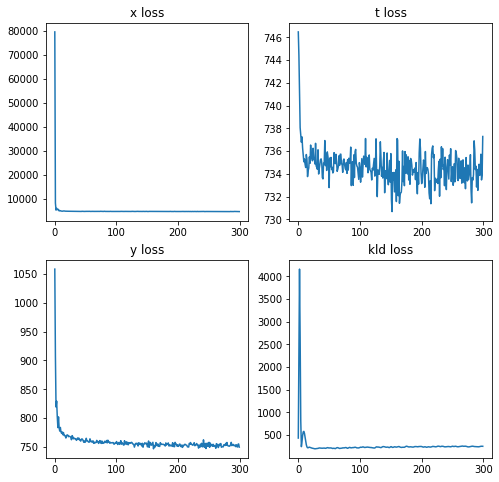

Total loss in the end:  6574.7578125
Estimated causal effect: 0.1874739691719209 true value: [1]


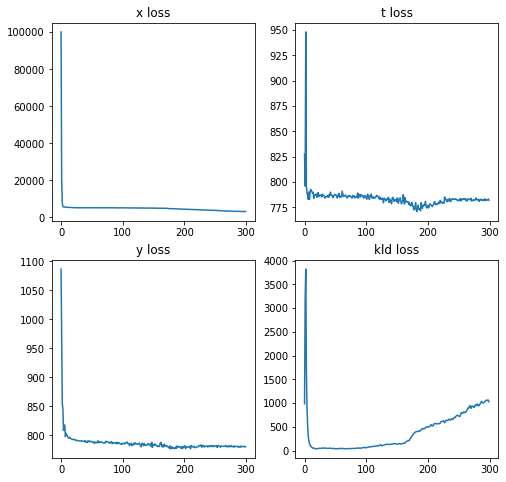

Total loss in the end:  5818.0755615234375
Estimated causal effect: 0.2308301580092537 true value: [1]


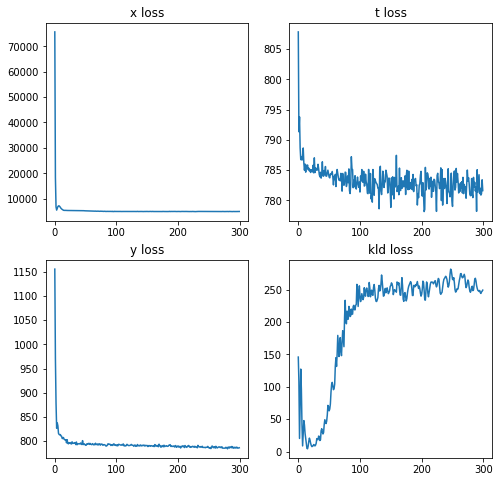

Total loss in the end:  6775.6192626953125
Estimated causal effect: 0.1686821636645432 true value: [1]


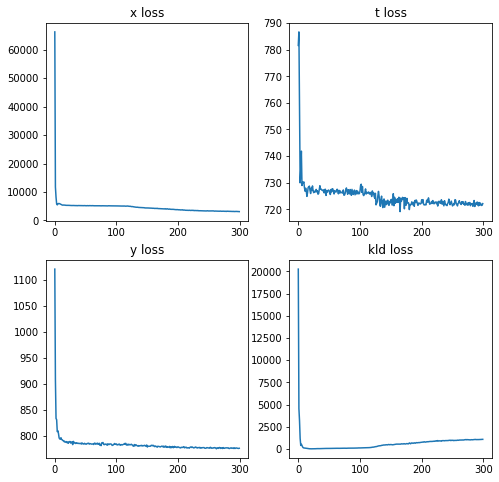

Total loss in the end:  5706.69287109375
Estimated causal effect: 0.1541689968895621 true value: [1]


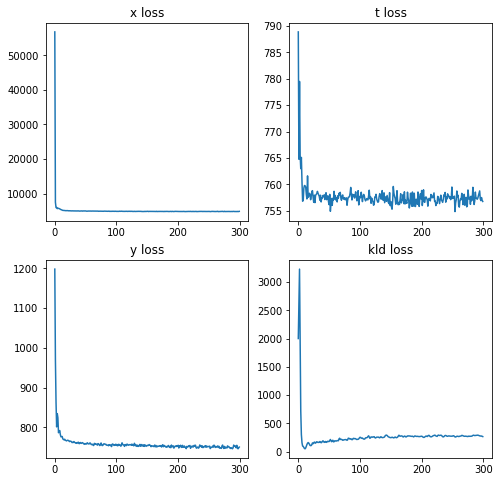

Total loss in the end:  6678.730712890625
Estimated causal effect: 0.15685504070693057 true value: [1]


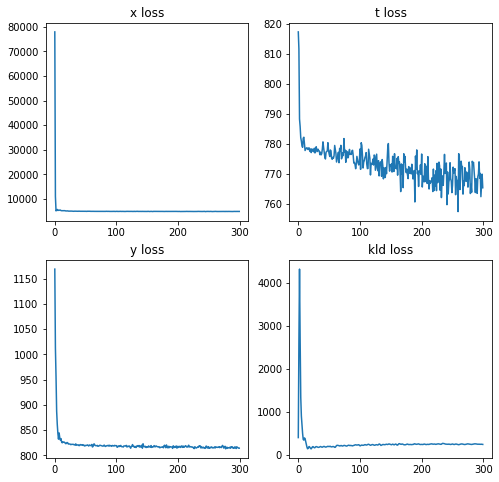

Total loss in the end:  6755.751953125
Estimated causal effect: 0.18420222845945897 true value: [1]


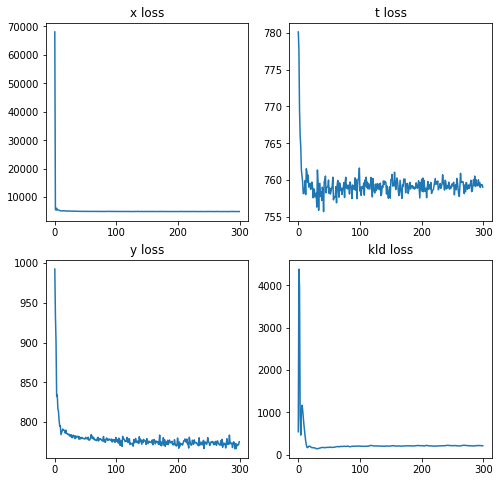

Total loss in the end:  6686.2117919921875
Estimated causal effect: 0.1263994055831658 true value: [1]


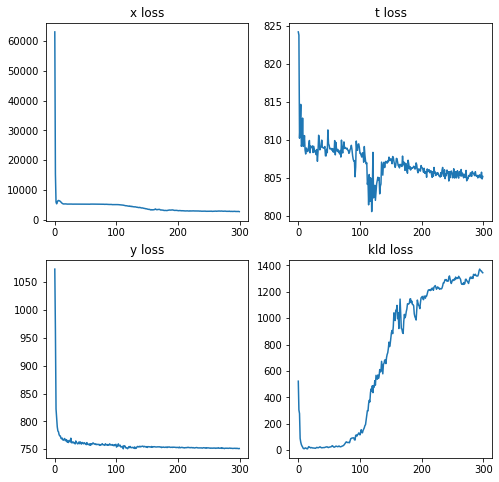

Total loss in the end:  5648.0224609375
Estimated causal effect: 0.2389173103947459 true value: [1]


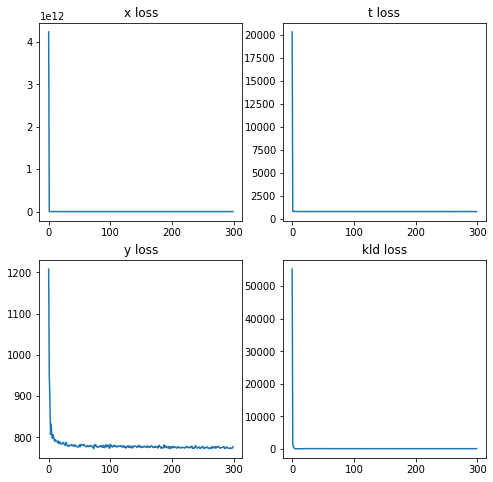

Total loss in the end:  6846.3594970703125
Estimated causal effect: 0.1546237333428945 true value: [1]


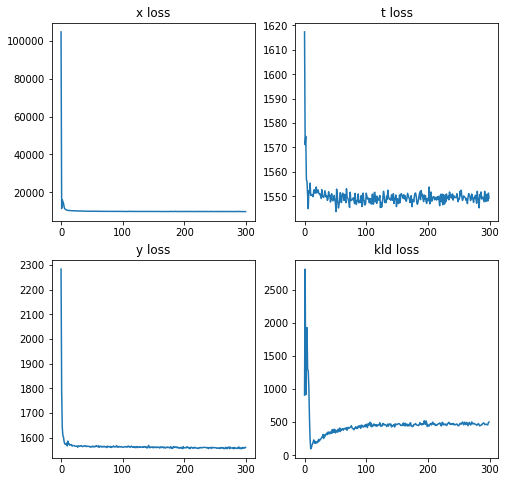

Total loss in the end:  13379.3095703125
Estimated causal effect: 0.14551057481093038 true value: [1]


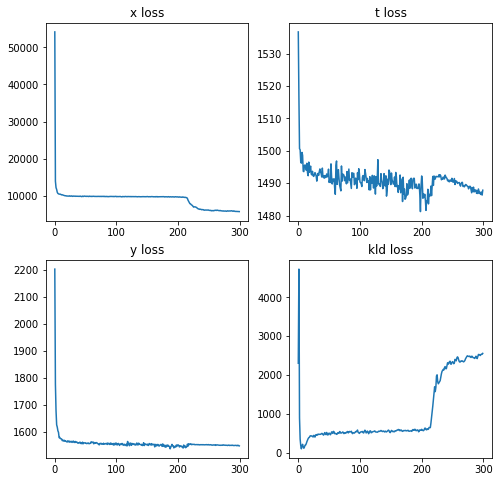

Total loss in the end:  11347.376953125
Estimated causal effect: 0.19485750853674283 true value: [1]


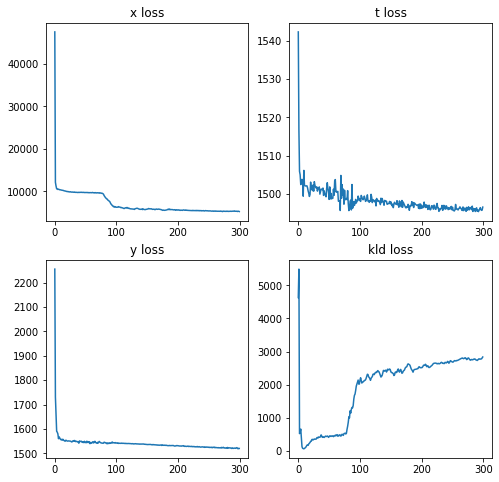

Total loss in the end:  11136.98681640625
Estimated causal effect: 0.18677381121184103 true value: [1]


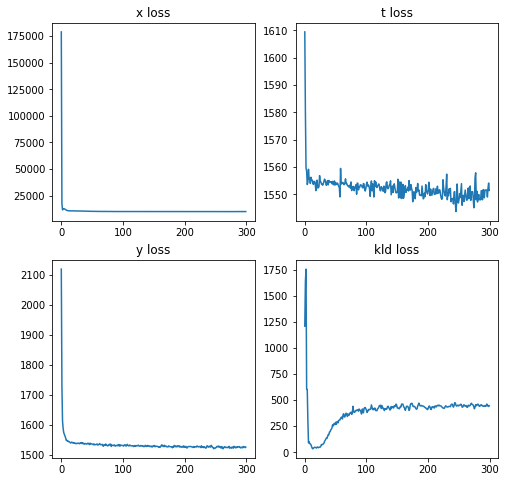

Total loss in the end:  13482.75634765625
Estimated causal effect: 0.19643973602615608 true value: [1]


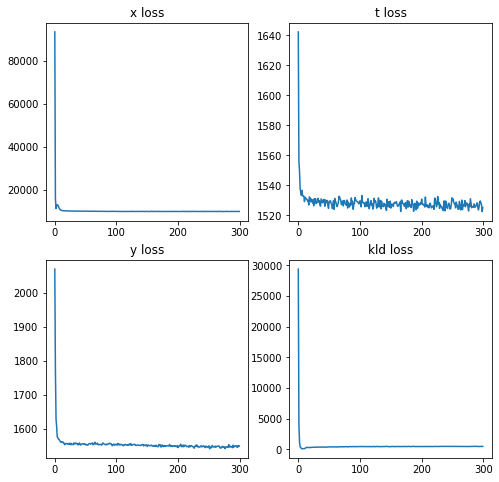

Total loss in the end:  13384.01806640625
Estimated causal effect: 0.1932917649583418 true value: [1]


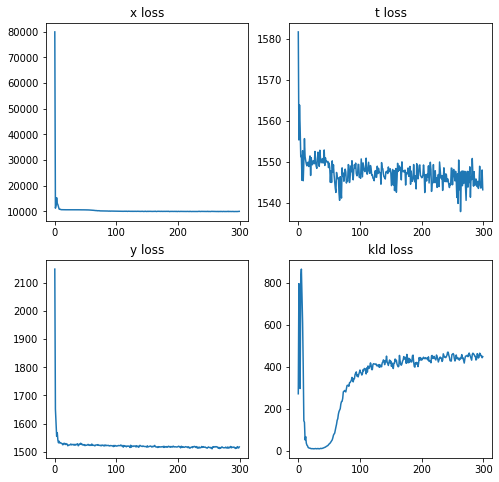

Total loss in the end:  13457.552734375
Estimated causal effect: 0.19453603231690406 true value: [1]


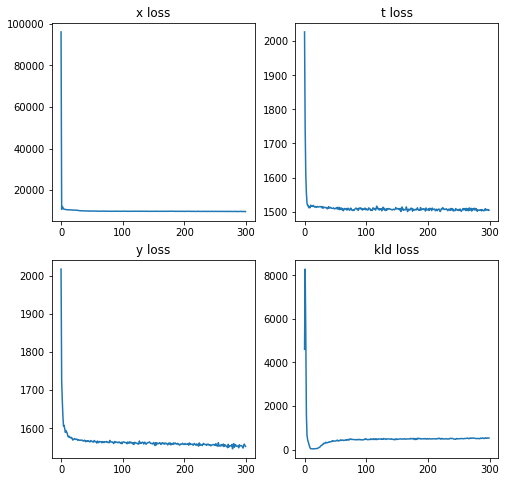

Total loss in the end:  13241.61083984375
Estimated causal effect: 0.16427411275773915 true value: [1]


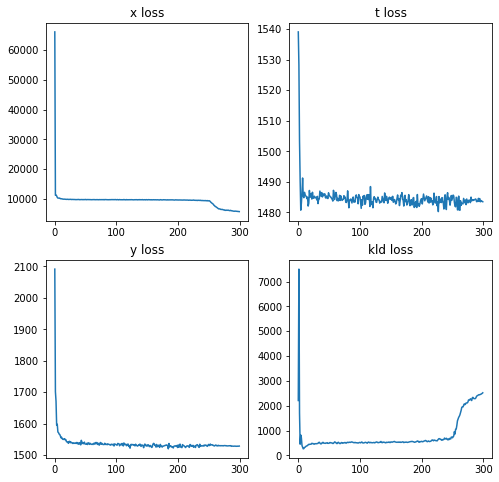

Total loss in the end:  11311.516357421875
Estimated causal effect: 0.142898699199152 true value: [1]


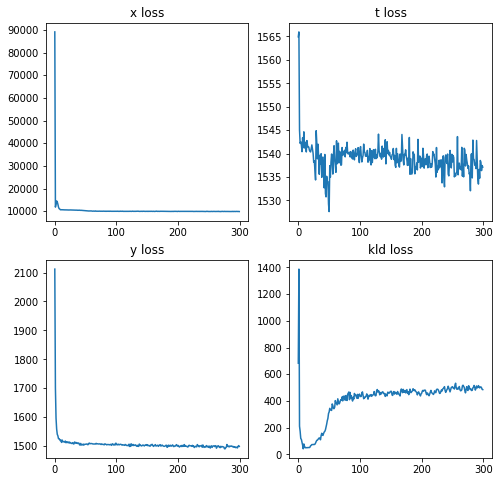

Total loss in the end:  13365.562255859375
Estimated causal effect: 0.1648447014436678 true value: [1]


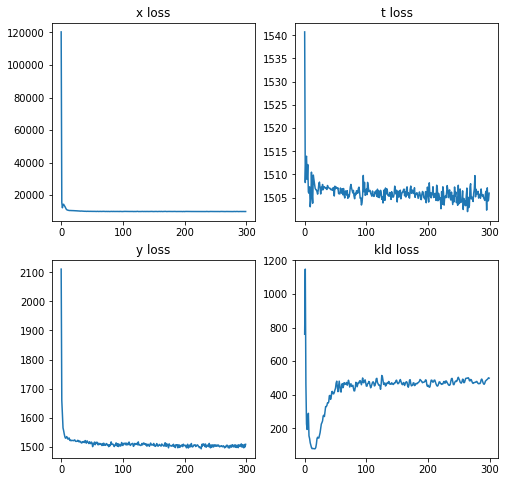

Total loss in the end:  13382.177490234375
Estimated causal effect: 0.16055530243392951 true value: [1]


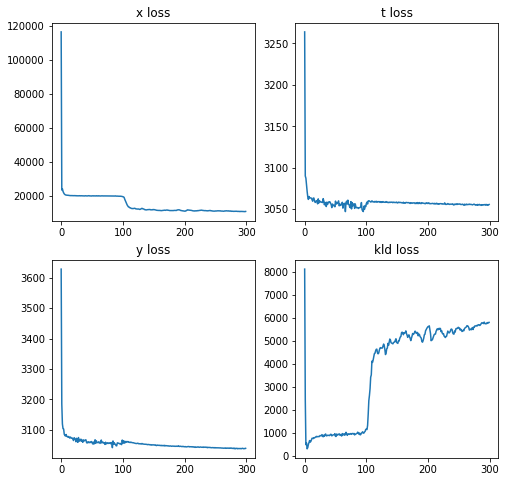

Total loss in the end:  22600.084716796875
Estimated causal effect: 0.16981120082505294 true value: [1]


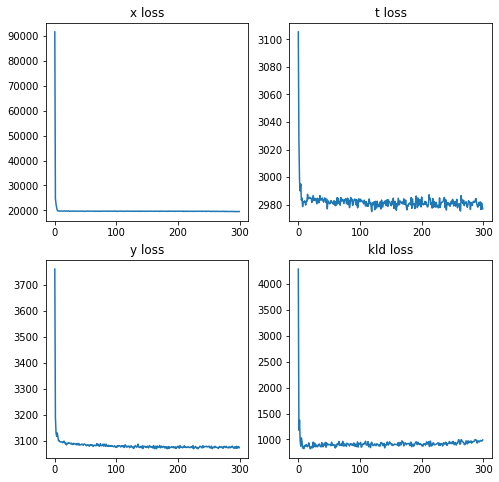

Total loss in the end:  26602.19873046875
Estimated causal effect: 0.14705447171406819 true value: [1]


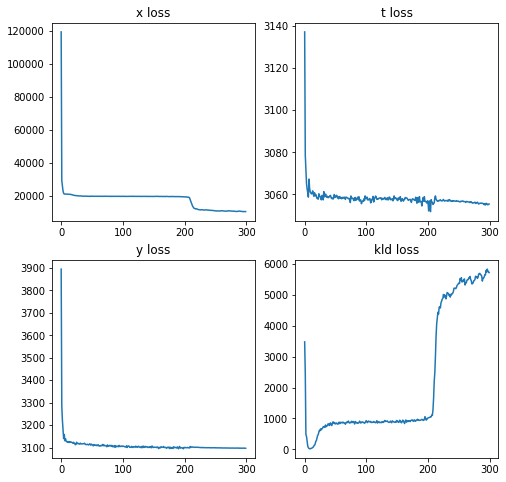

Total loss in the end:  22479.393310546875
Estimated causal effect: 0.1768812301006882 true value: [1]


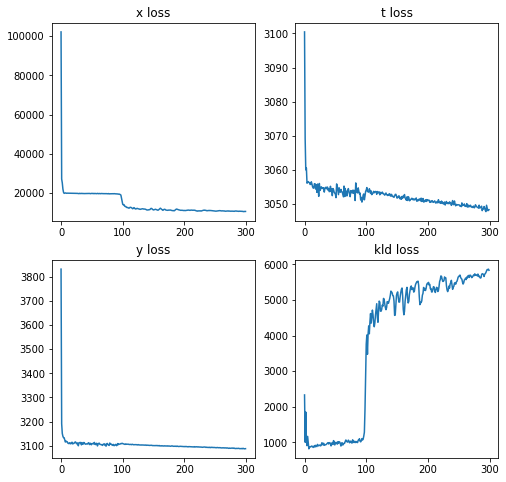

Total loss in the end:  22607.532958984375
Estimated causal effect: 0.1562075862552768 true value: [1]


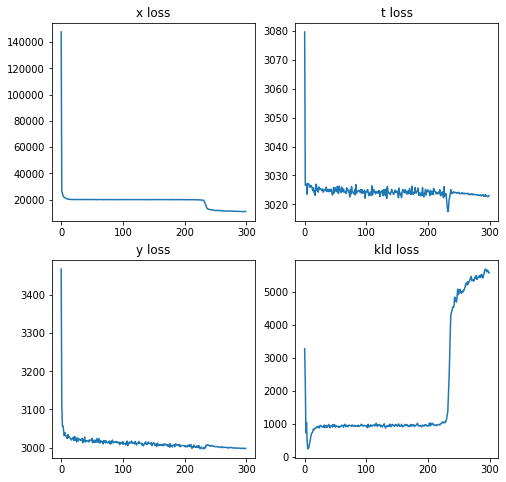

Total loss in the end:  22549.3232421875
Estimated causal effect: 0.17593817993682406 true value: [1]


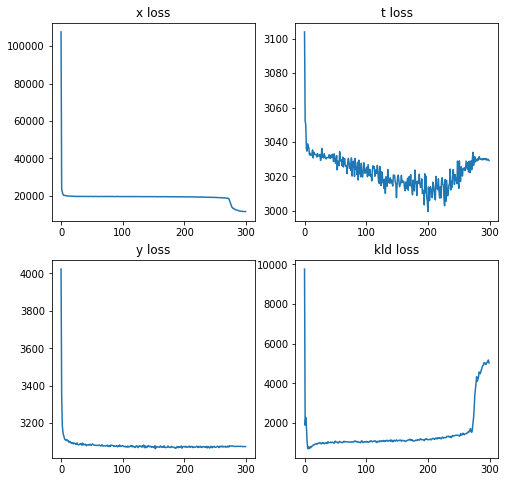

Total loss in the end:  22736.910400390625
Estimated causal effect: 0.14520730074900257 true value: [1]


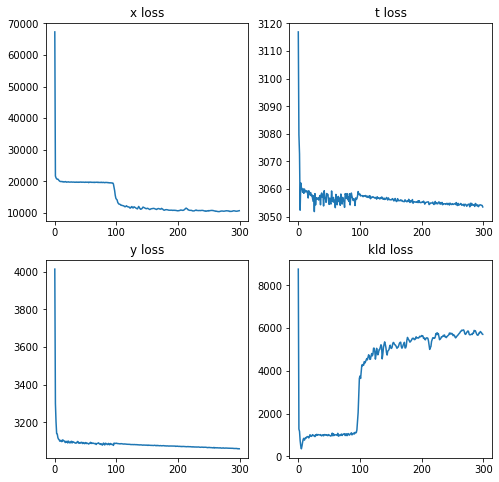

Total loss in the end:  22543.867919921875
Estimated causal effect: 0.12858107143008254 true value: [1]


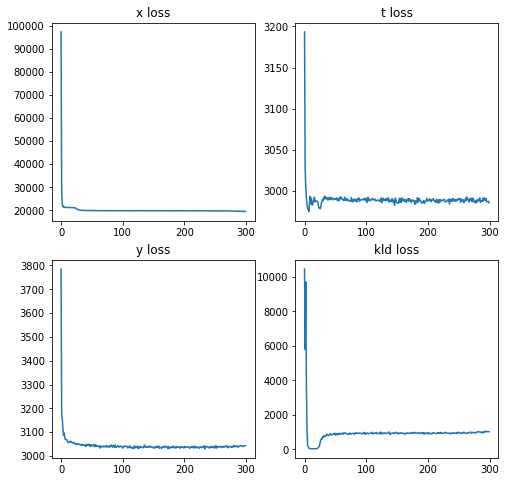

Total loss in the end:  26553.0205078125
Estimated causal effect: 0.14943301880927815 true value: [1]


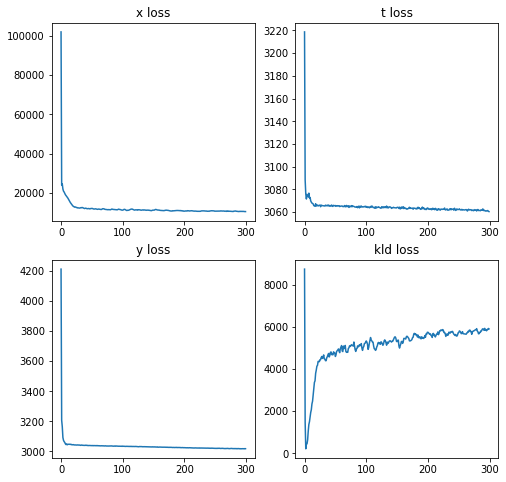

Total loss in the end:  22381.282470703125
Estimated causal effect: 0.16407589586787685 true value: [1]


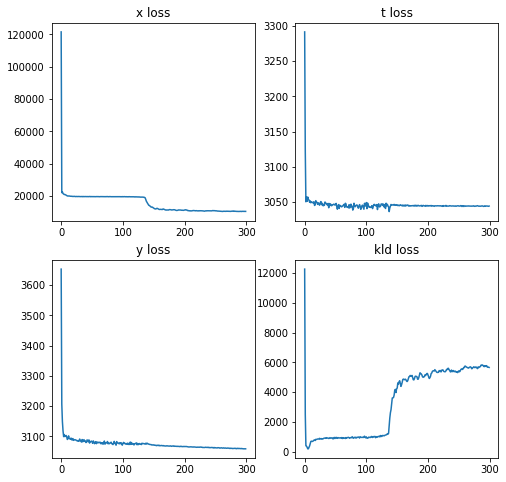

Total loss in the end:  22354.90771484375
Estimated causal effect: 0.15294232729593824 true value: [1]


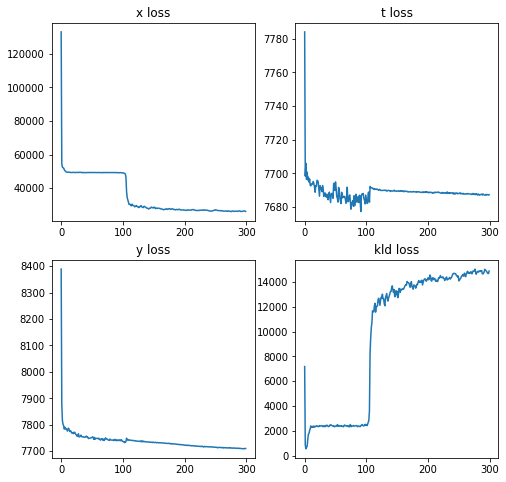

Total loss in the end:  56416.31640625
Estimated causal effect: 0.14251788290998368 true value: [1]


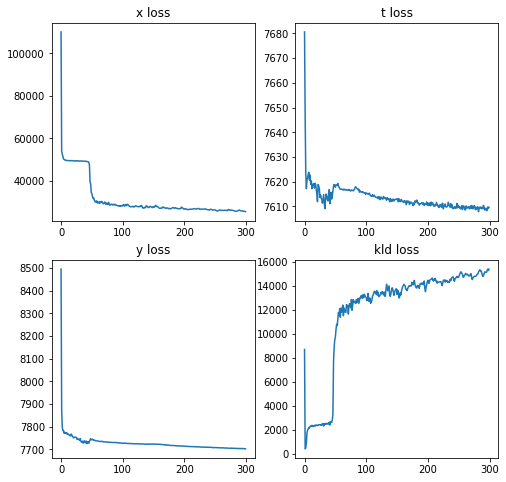

Total loss in the end:  56260.78369140625
Estimated causal effect: 0.17397241273512448 true value: [1]


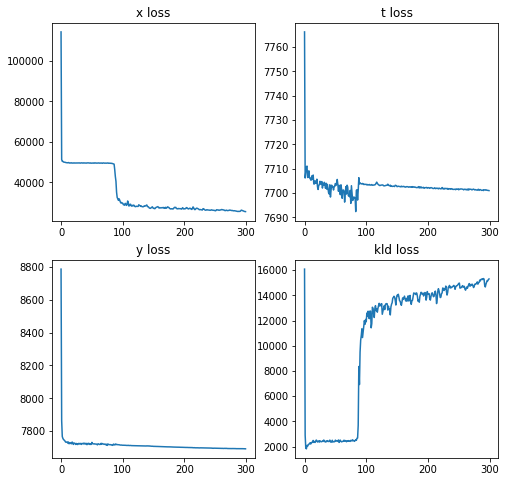

Total loss in the end:  56295.30126953125
Estimated causal effect: 0.1451591697778375 true value: [1]


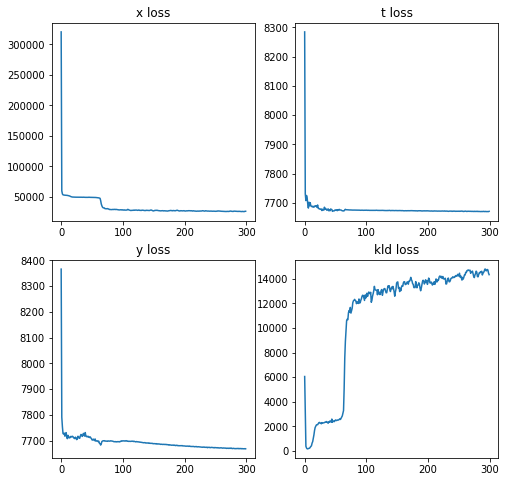

Total loss in the end:  56426.42578125
Estimated causal effect: 0.1907099742935668 true value: [1]


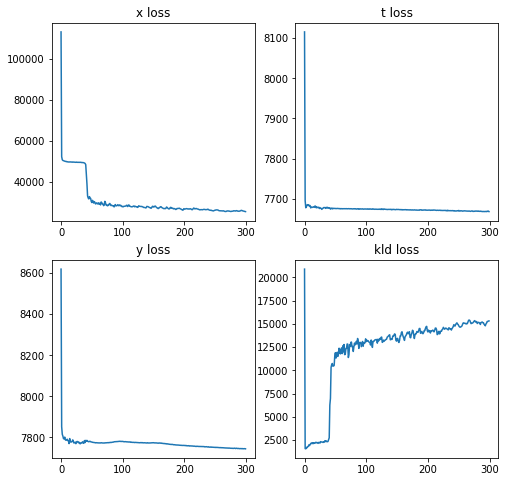

Total loss in the end:  56239.431884765625
Estimated causal effect: 0.13718458092452132 true value: [1]


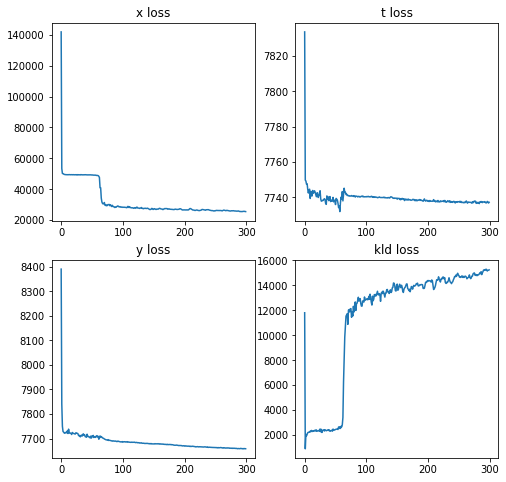

Total loss in the end:  56144.625
Estimated causal effect: 0.16227899811161187 true value: [1]


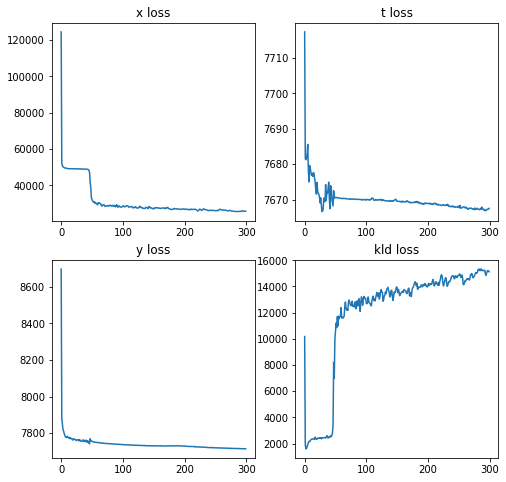

Total loss in the end:  56293.7568359375
Estimated causal effect: 0.16327288099438386 true value: [1]


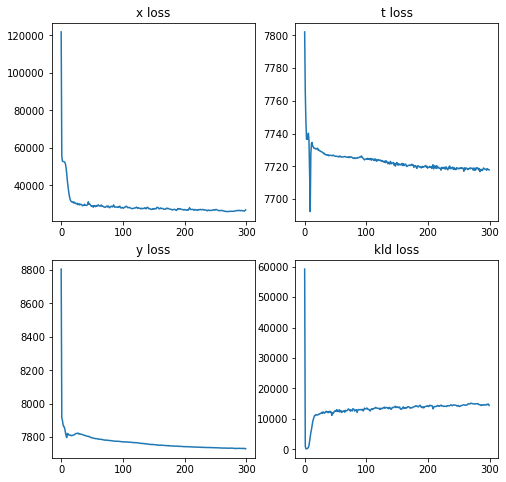

Total loss in the end:  56795.666748046875
Estimated causal effect: 0.15247045704945086 true value: [1]


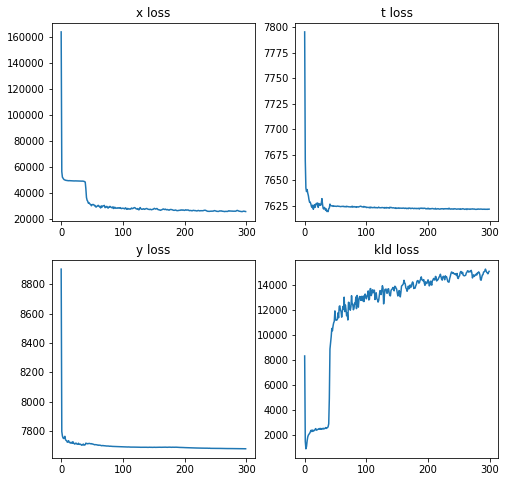

Total loss in the end:  56190.575439453125
Estimated causal effect: 0.1490730122967676 true value: [1]


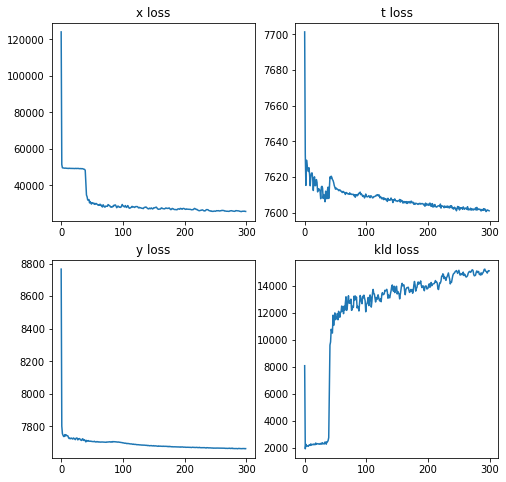

Total loss in the end:  56101.9833984375
Estimated causal effect: 0.14585743880939392 true value: [1]


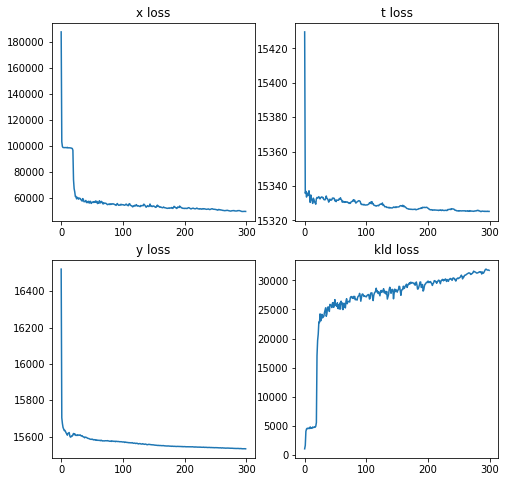

Total loss in the end:  112312.18530273438
Estimated causal effect: 0.14909284338276727 true value: [1]


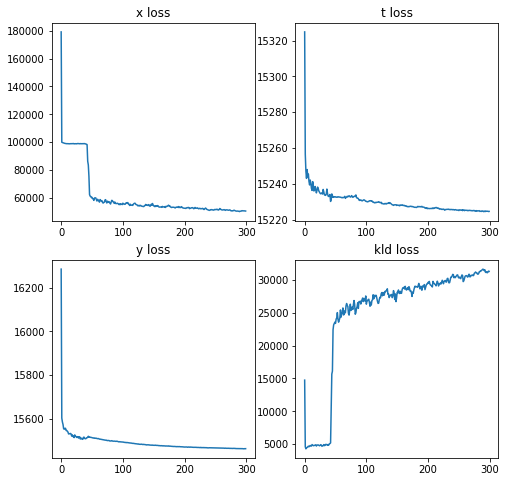

Total loss in the end:  112272.525390625
Estimated causal effect: 0.16096241505021466 true value: [1]


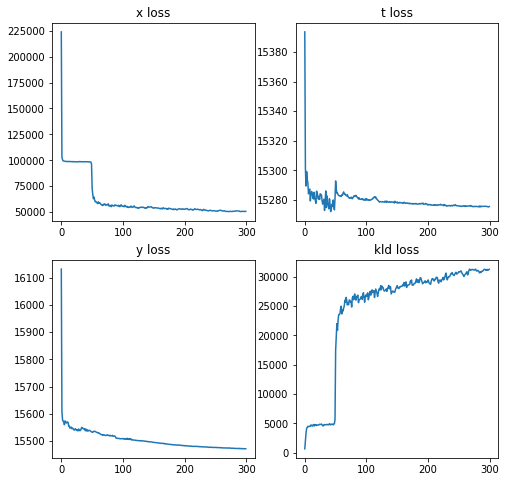

Total loss in the end:  112647.58984375
Estimated causal effect: 0.15134231925497202 true value: [1]


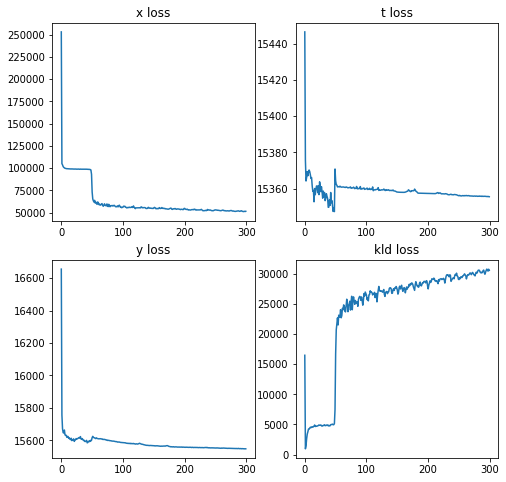

Total loss in the end:  112937.87744140625
Estimated causal effect: 0.13649813880160175 true value: [1]


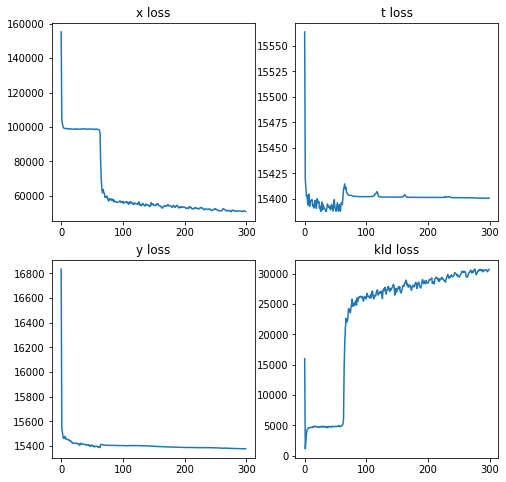

Total loss in the end:  112299.25610351562
Estimated causal effect: 0.14499345253390516 true value: [1]


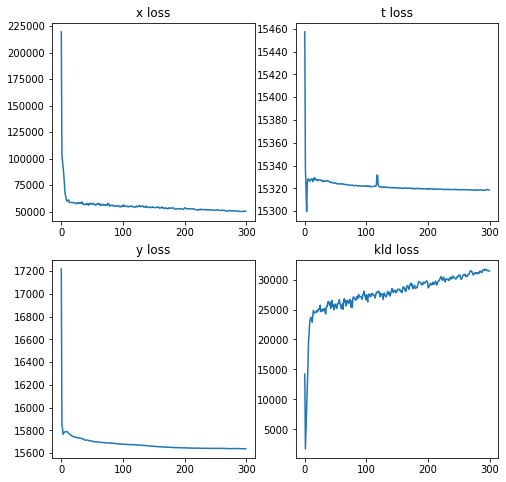

Total loss in the end:  112860.4638671875
Estimated causal effect: 0.15391191543329089 true value: [1]


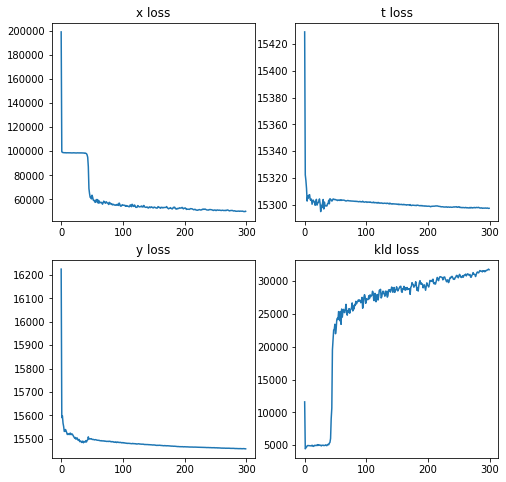

Total loss in the end:  112676.8828125
Estimated causal effect: 0.1416048310976092 true value: [1]


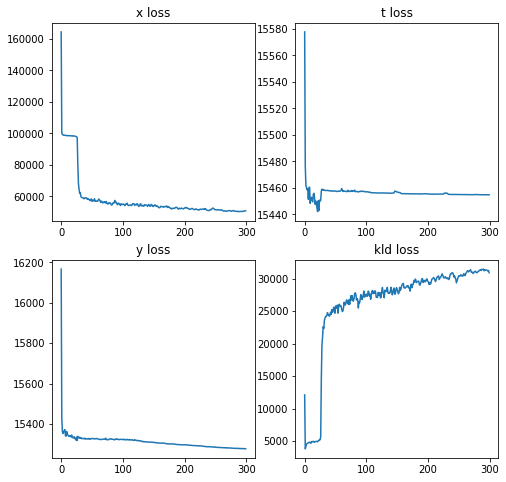

Total loss in the end:  112405.6650390625
Estimated causal effect: 0.16265291542670904 true value: [1]


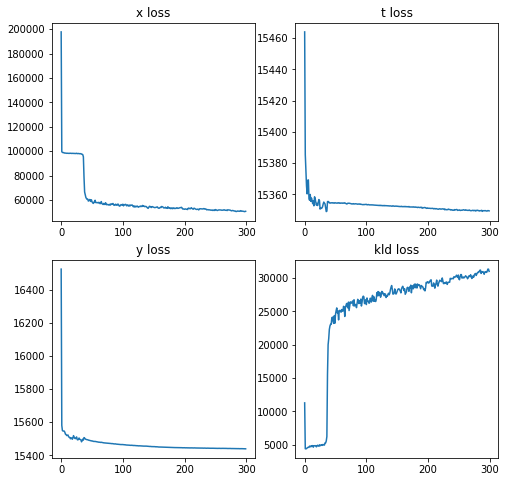

Total loss in the end:  112470.32397460938
Estimated causal effect: 0.17914522303233713 true value: [1]


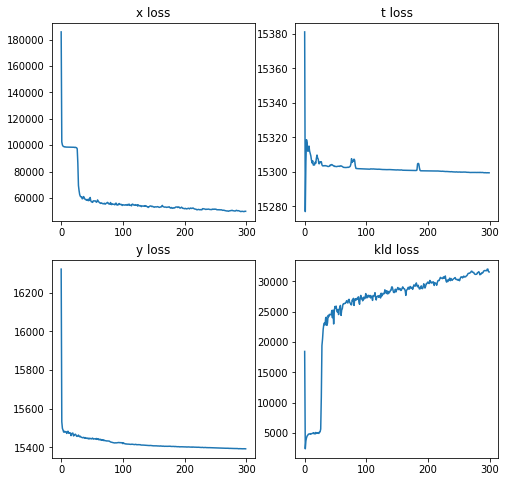

Total loss in the end:  112137.51928710938
Estimated causal effect: 0.15197543078098244 true value: [1]


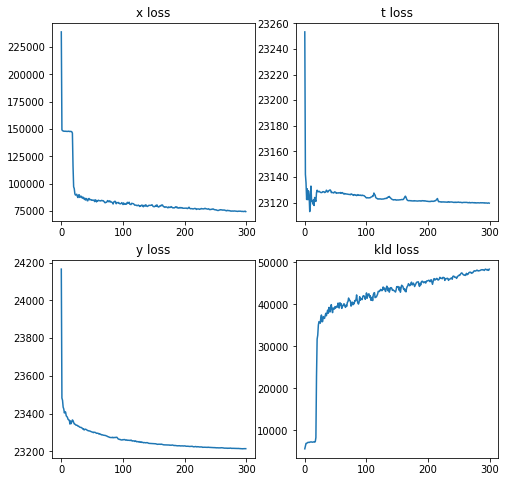

Total loss in the end:  169031.26196289062
Estimated causal effect: 0.1671116443115307 true value: [1]


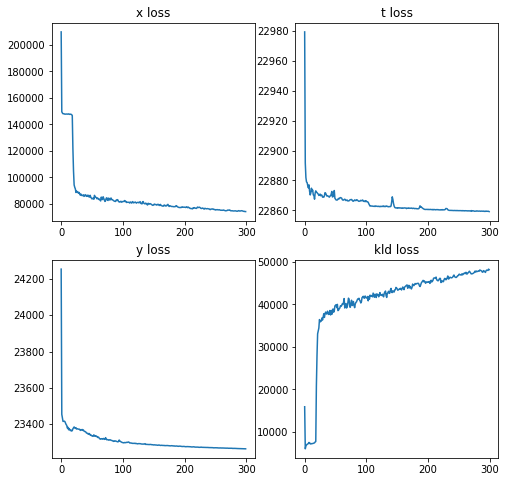

Total loss in the end:  168352.80102539062
Estimated causal effect: 0.14824189915336938 true value: [1]


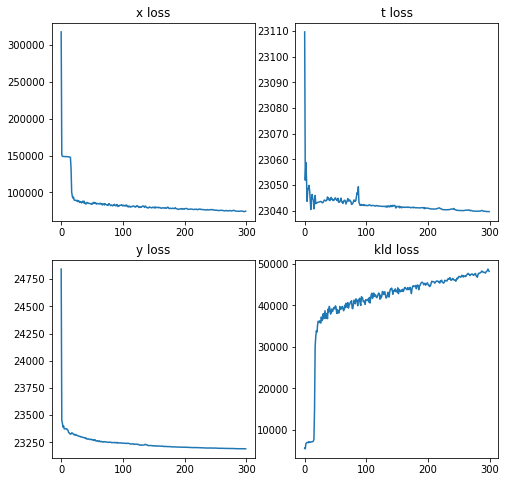

Total loss in the end:  169042.96606445312
Estimated causal effect: 0.14896594609588382 true value: [1]


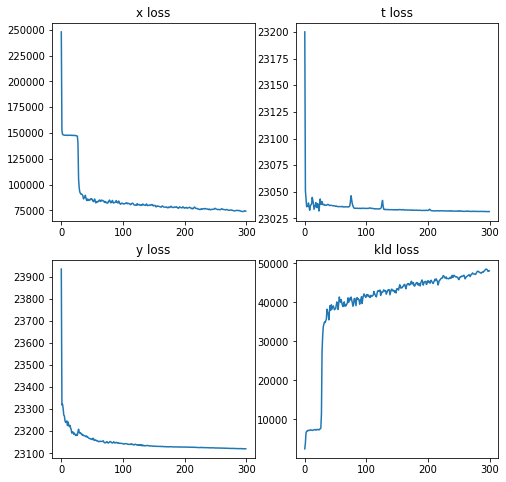

Total loss in the end:  168345.85375976562
Estimated causal effect: 0.15566255455302144 true value: [1]


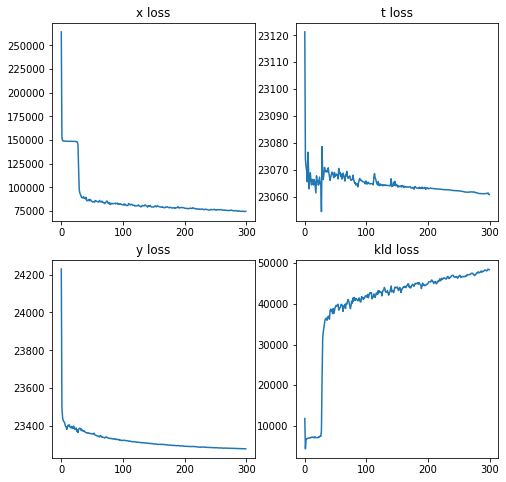

Total loss in the end:  169294.63110351562
Estimated causal effect: 0.15417576614953046 true value: [1]


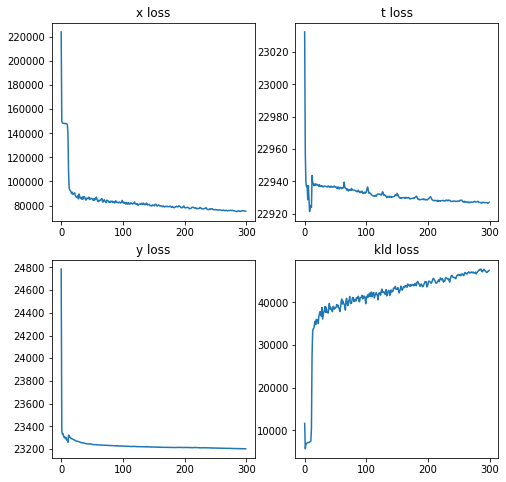

Total loss in the end:  168899.32763671875
Estimated causal effect: 0.1331770317653519 true value: [1]


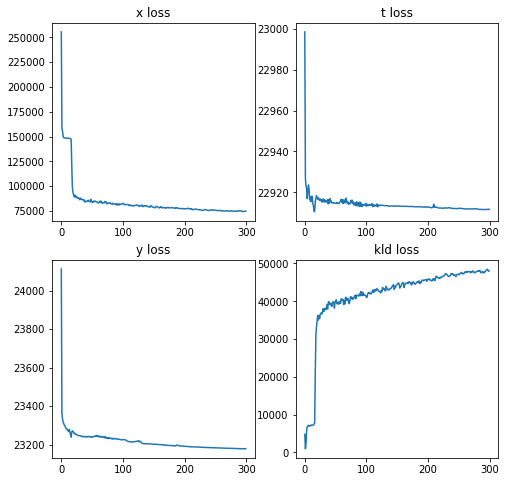

Total loss in the end:  168965.337890625
Estimated causal effect: 0.1561695360145589 true value: [1]


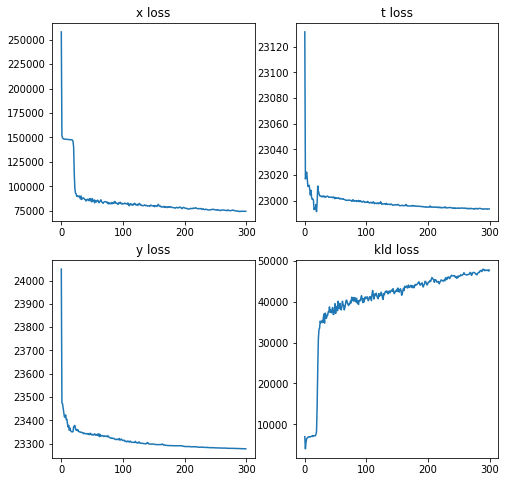

Total loss in the end:  168570.63671875
Estimated causal effect: 0.13888352062247405 true value: [1]


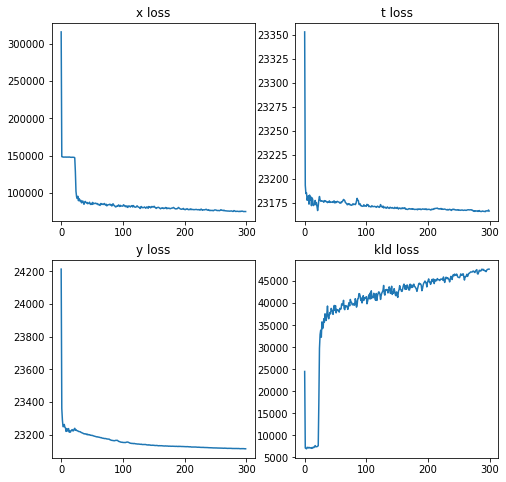

Total loss in the end:  168876.87353515625
Estimated causal effect: 0.14778179005105793 true value: [1]


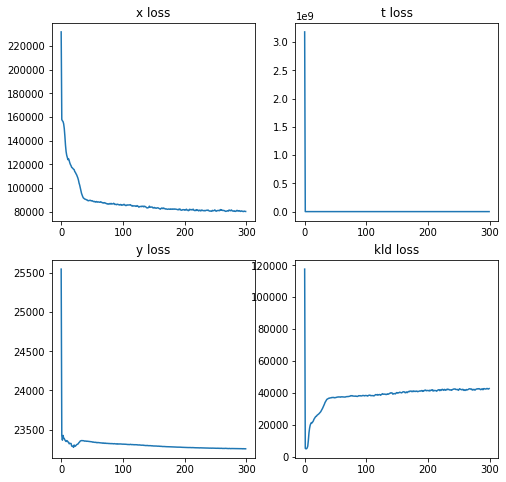

Total loss in the end:  169289.49536132812
Estimated causal effect: 0.12410864099140193 true value: [1]


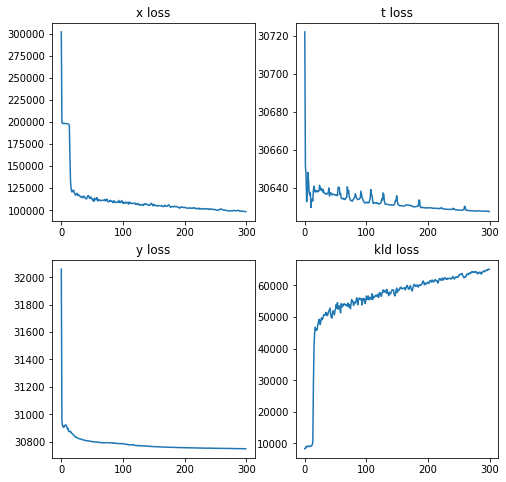

Total loss in the end:  224992.93603515625
Estimated causal effect: 0.14005698287142299 true value: [1]


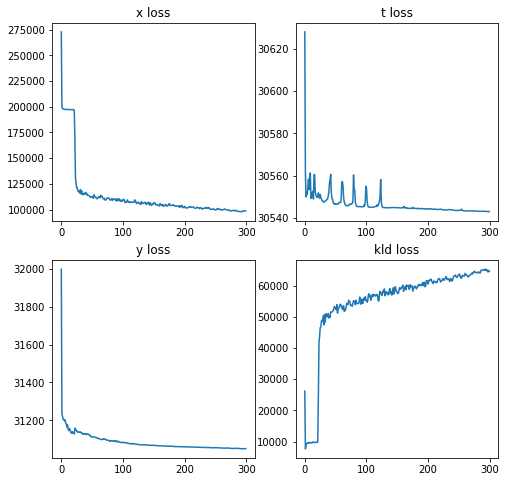

Total loss in the end:  224799.67260742188
Estimated causal effect: 0.14384154000520533 true value: [1]


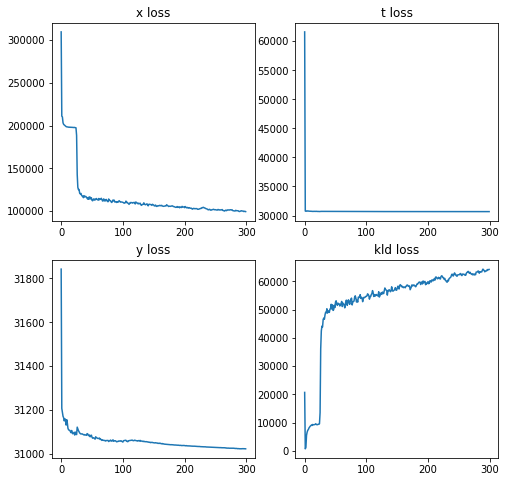

Total loss in the end:  225328.54711914062
Estimated causal effect: 0.1416949503851238 true value: [1]


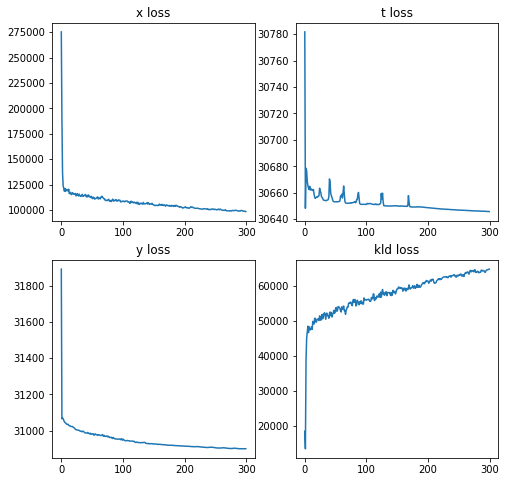

Total loss in the end:  224752.40112304688
Estimated causal effect: 0.16217398859614476 true value: [1]


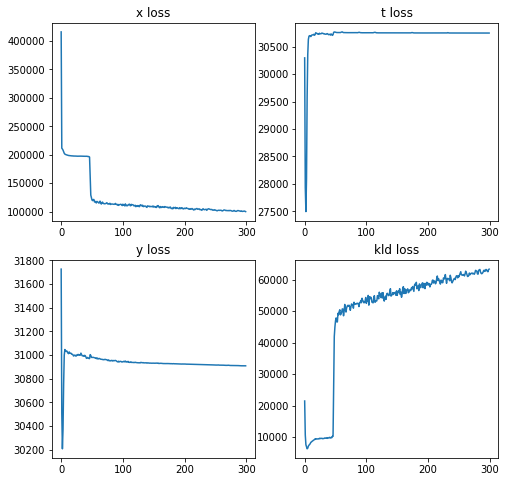

Total loss in the end:  224899.4453125
Estimated causal effect: 0.1388696572364147 true value: [1]


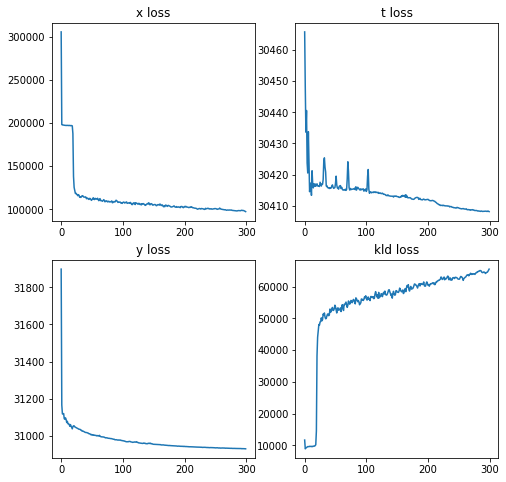

Total loss in the end:  224251.53442382812
Estimated causal effect: 0.15506956780109896 true value: [1]


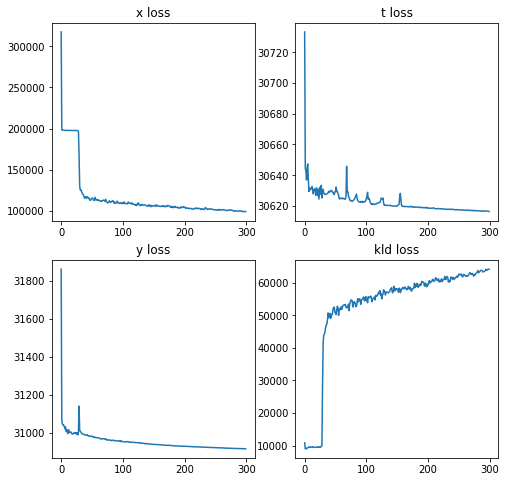

Total loss in the end:  224963.96264648438
Estimated causal effect: 0.1435489018250592 true value: [1]


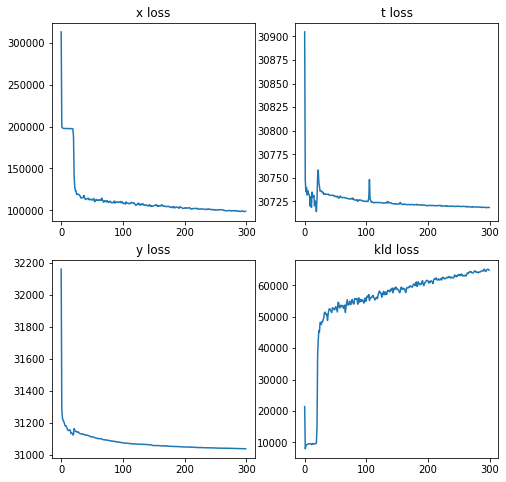

Total loss in the end:  225315.98022460938
Estimated causal effect: 0.15078818956041265 true value: [1]


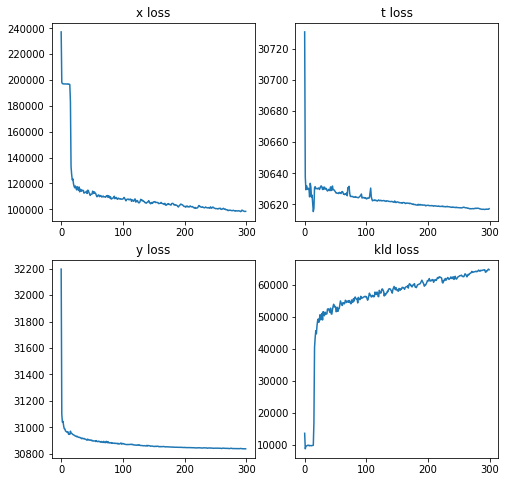

Total loss in the end:  224682.83935546875
Estimated causal effect: 0.15427142581298187 true value: [1]


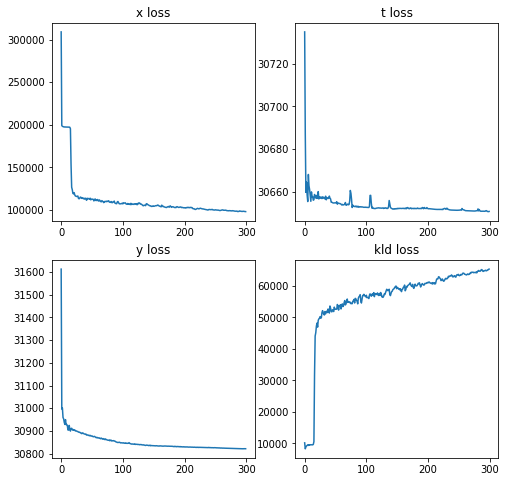

Total loss in the end:  224672.4306640625
Estimated causal effect: 0.14119026401901652 true value: [1]


In [16]:
# Run the model
models, losses = run_model_for_predef_datasets(datasets, param_times, main_folder, sub_folder_model, 
                                               BATCH_SIZE, track_function, true_value, 
                                               device, train_arguments, labels, data_labels)

# Run experiment with zdim=2

In [10]:
BATCH_SIZE = 200
track_function = lambda model: estimate_AID_lineardata(model, c_yt, c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=1000)[0]
true_value = c_yt
device = 'cpu'

num_epochs=300
lr_start=0.01
lr_end=0.001
x_dim=3
z_dim=2
x_mode=np.array([0]*x_dim)
t_mode=0
y_mode=0
ty_separate_enc=False
z_mode=0
common_stds = False

p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30

param_times = 10

x_loss_scaling=1

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "NNzdim2500to20000"
labels = data_labels

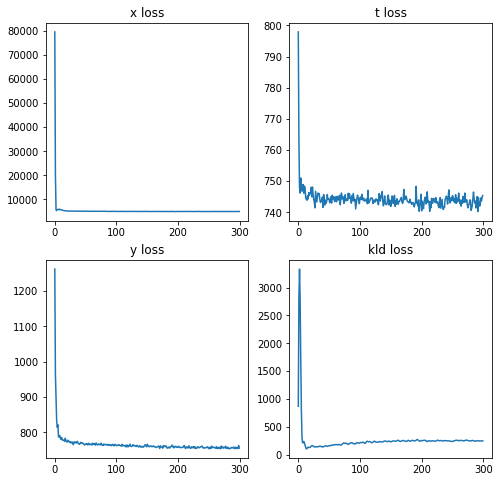

Total loss in the end:  6755.3919677734375
Estimated causal effect: 0.21146232740702076 true value: [1]


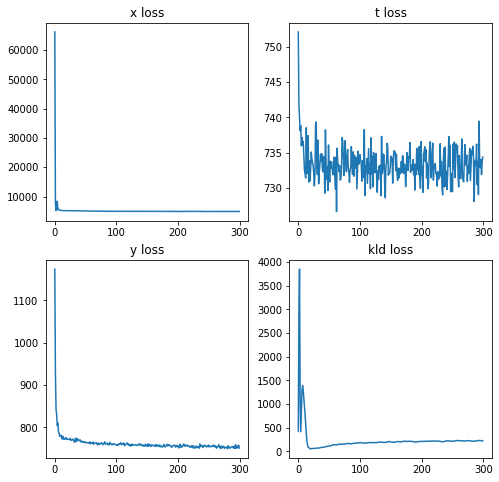

Total loss in the end:  6614.9830322265625
Estimated causal effect: 0.18911643803493922 true value: [1]


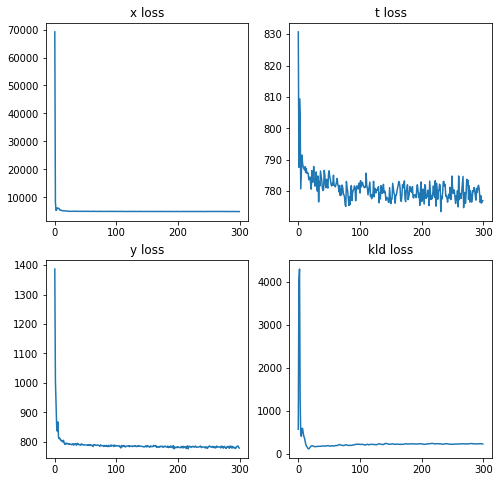

Total loss in the end:  6684.9537353515625
Estimated causal effect: 0.21928805327048337 true value: [1]


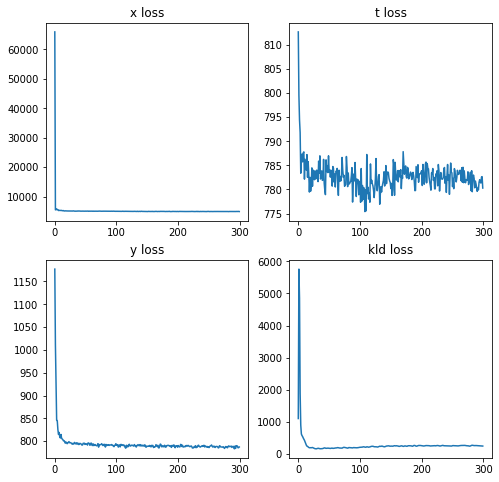

Total loss in the end:  6751.021484375
Estimated causal effect: 0.16324395336863437 true value: [1]


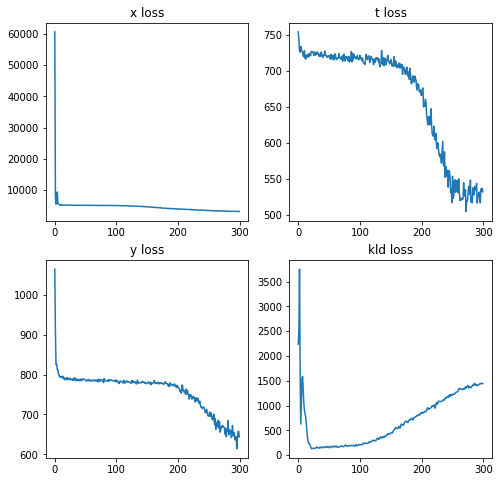

Total loss in the end:  5727.5030517578125
Estimated causal effect: 0.37574165389787884 true value: [1]


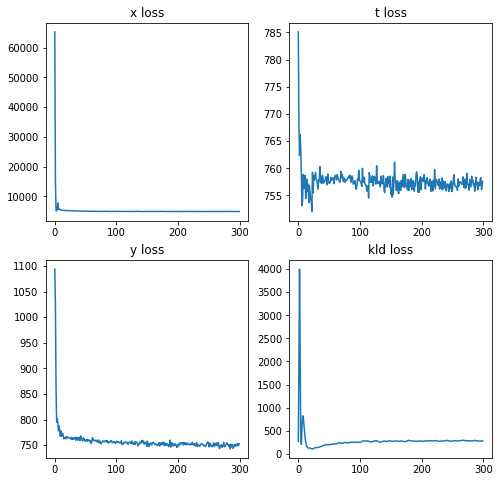

Total loss in the end:  6647.462890625
Estimated causal effect: 0.1478659220025237 true value: [1]


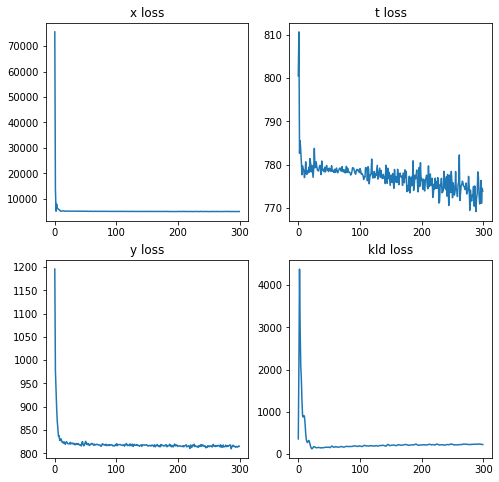

Total loss in the end:  6772.561279296875
Estimated causal effect: 0.1820185843085611 true value: [1]


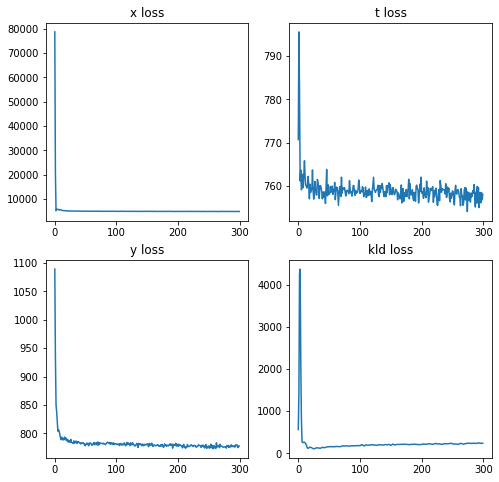

Total loss in the end:  6673.642578125
Estimated causal effect: 0.12978394299805265 true value: [1]


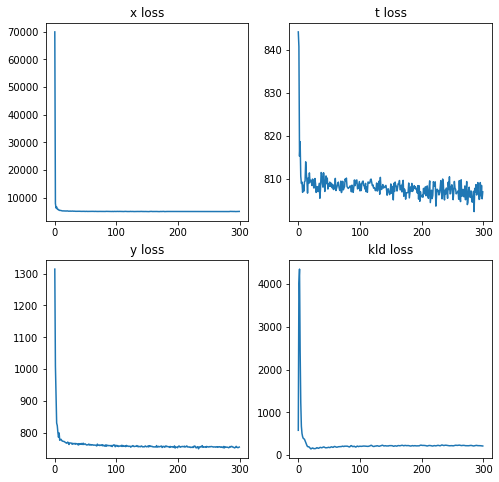

Total loss in the end:  6741.953857421875
Estimated causal effect: 0.23059474401534047 true value: [1]


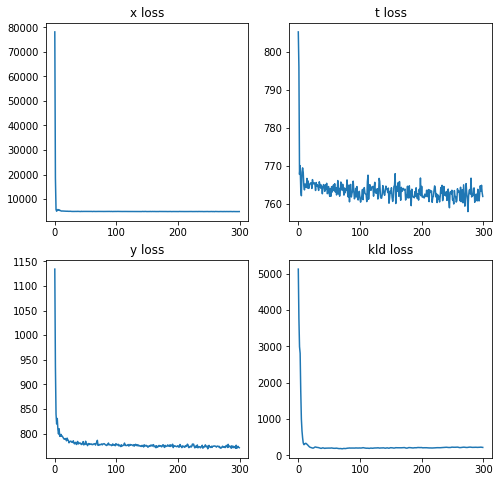

Total loss in the end:  6674.6749267578125
Estimated causal effect: 0.14769301493499085 true value: [1]


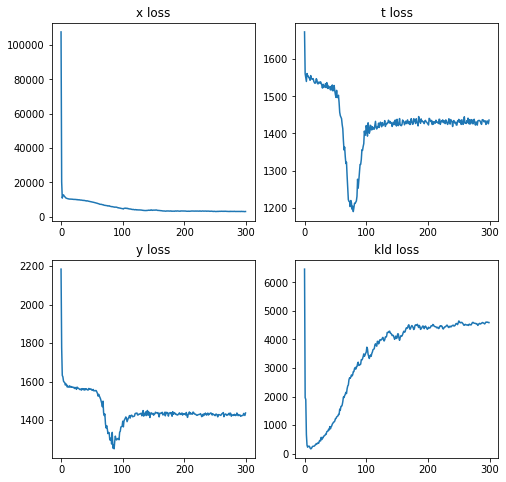

Total loss in the end:  10415.630126953125
Estimated causal effect: 0.04620615732231846 true value: [1]


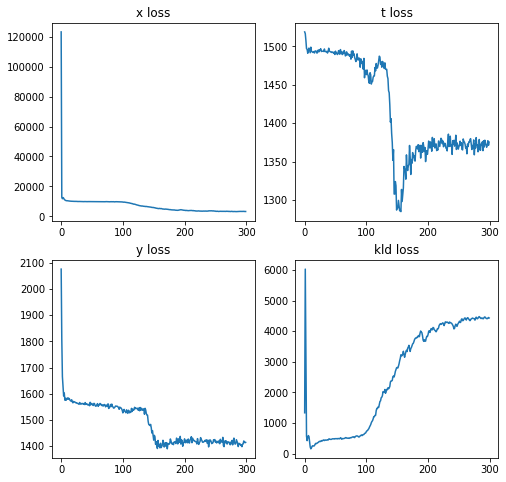

Total loss in the end:  10519.56396484375
Estimated causal effect: 0.08849044498934275 true value: [1]


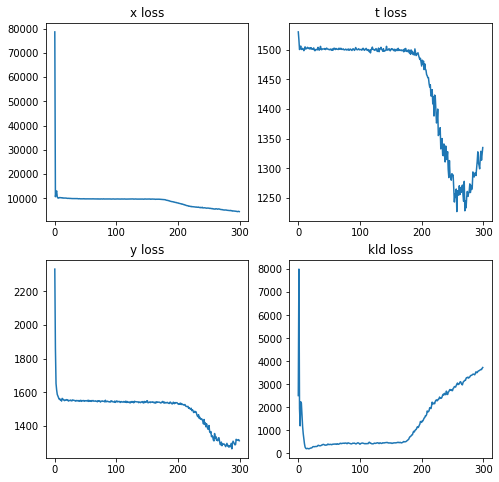

Total loss in the end:  10967.471923828125
Estimated causal effect: 0.14267895482280954 true value: [1]


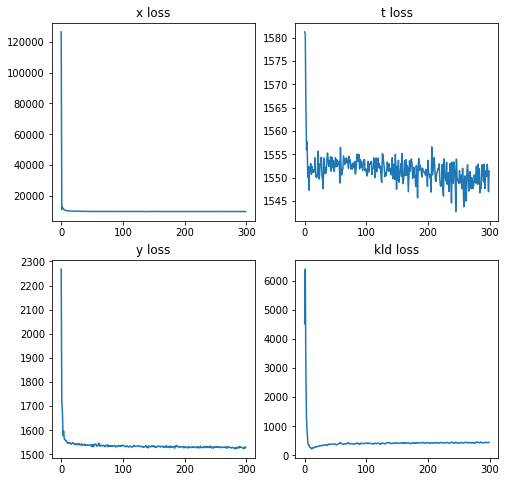

Total loss in the end:  13483.697998046875
Estimated causal effect: 0.18542357305754384 true value: [1]


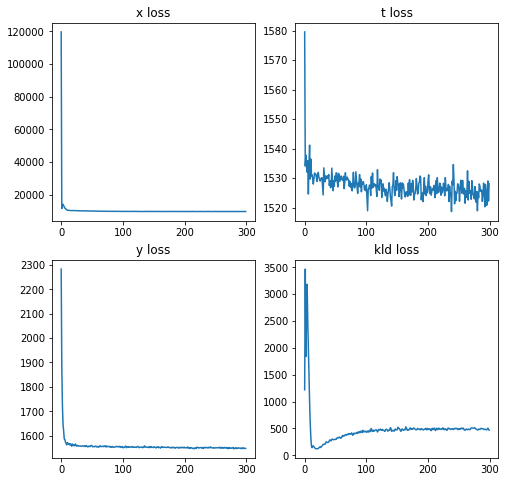

Total loss in the end:  13377.8896484375
Estimated causal effect: 0.19961230762600507 true value: [1]


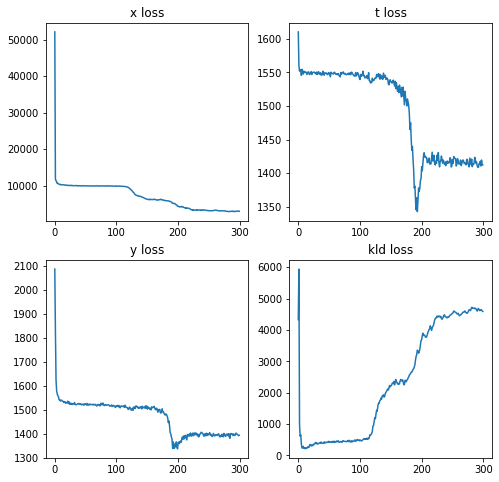

Total loss in the end:  10390.224609375
Estimated causal effect: 0.06518782300774331 true value: [1]


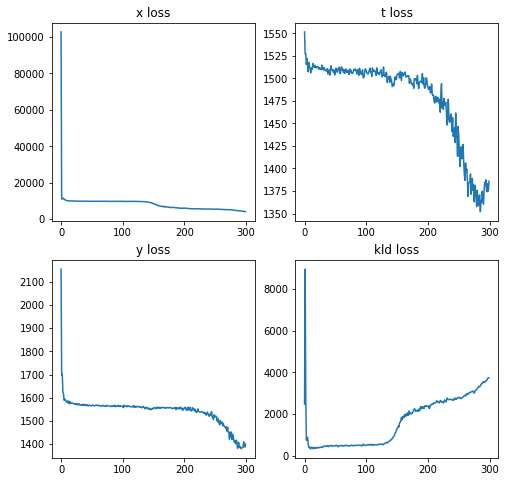

Total loss in the end:  10684.6318359375
Estimated causal effect: 0.06828403031781881 true value: [1]


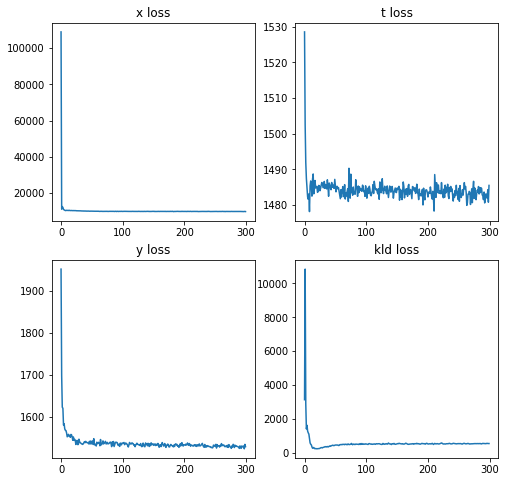

Total loss in the end:  13261.3837890625
Estimated causal effect: 0.14348840207164845 true value: [1]


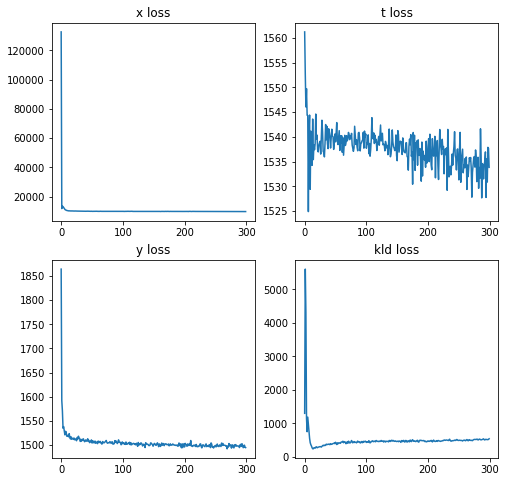

Total loss in the end:  13379.90478515625
Estimated causal effect: 0.16556436179837458 true value: [1]


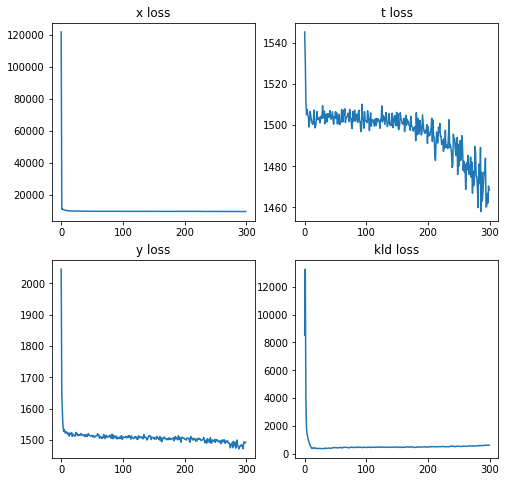

Total loss in the end:  13345.614013671875
Estimated causal effect: 0.12117378387091919 true value: [1]


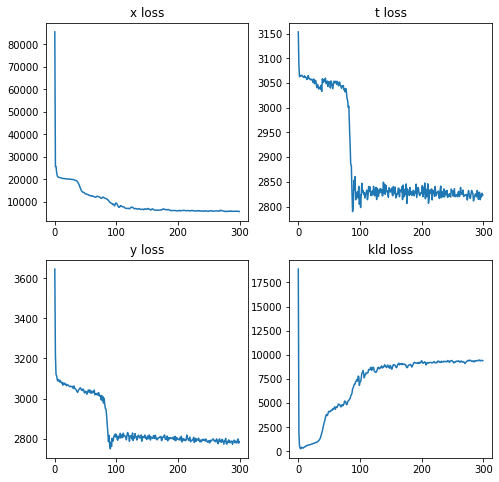

Total loss in the end:  20705.894775390625
Estimated causal effect: 0.05722287621597547 true value: [1]


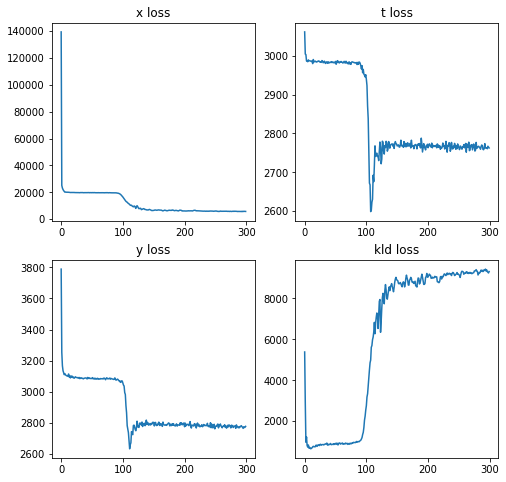

Total loss in the end:  20611.117797851562
Estimated causal effect: 0.048641767539162536 true value: [1]


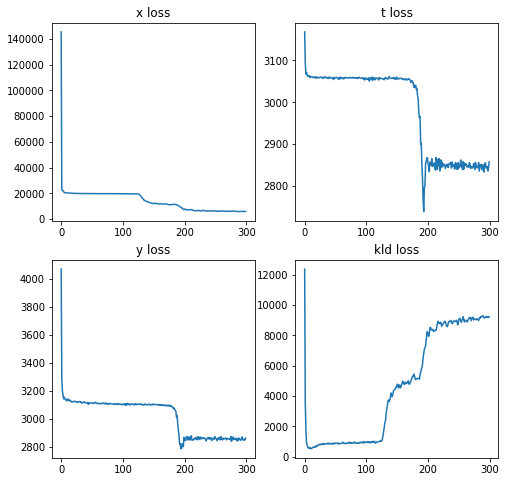

Total loss in the end:  20878.629150390625
Estimated causal effect: 0.07619664727134123 true value: [1]


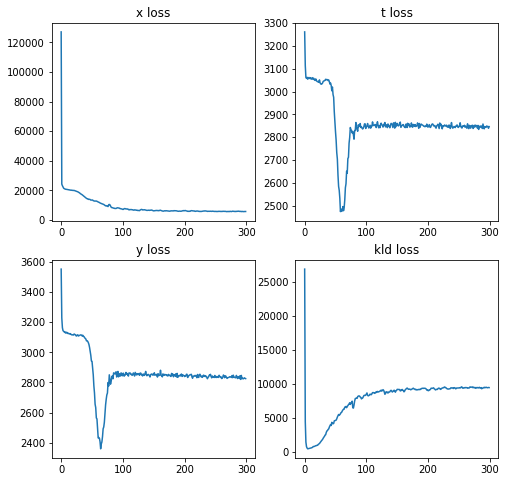

Total loss in the end:  20794.618408203125
Estimated causal effect: 0.03967194293688428 true value: [1]


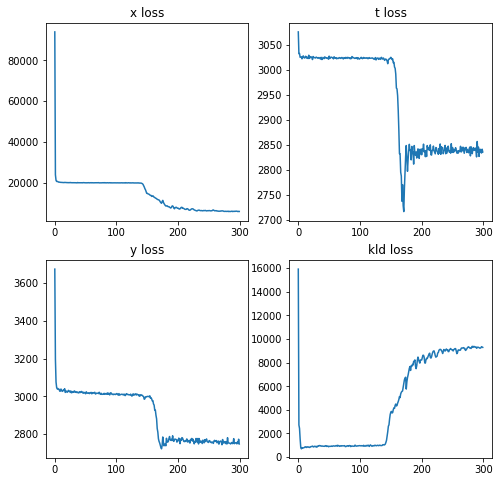

Total loss in the end:  20840.82373046875
Estimated causal effect: 0.06632928864895914 true value: [1]


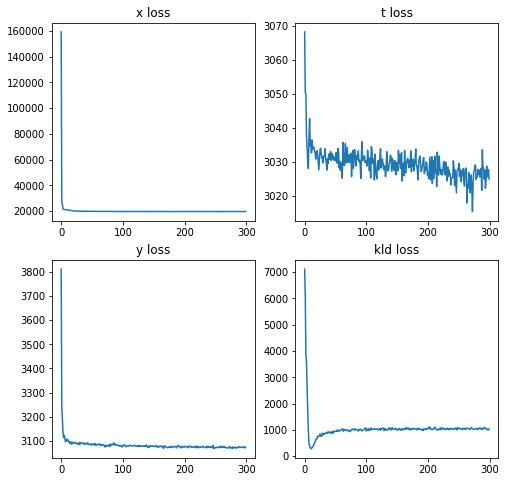

Total loss in the end:  26711.734130859375
Estimated causal effect: 0.14736869928209623 true value: [1]


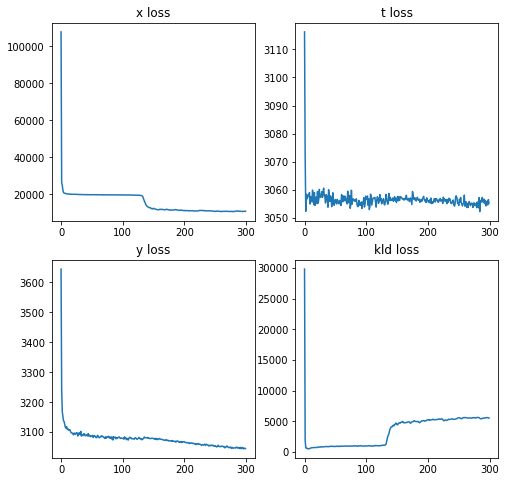

Total loss in the end:  22523.15771484375
Estimated causal effect: 0.13270063024092593 true value: [1]


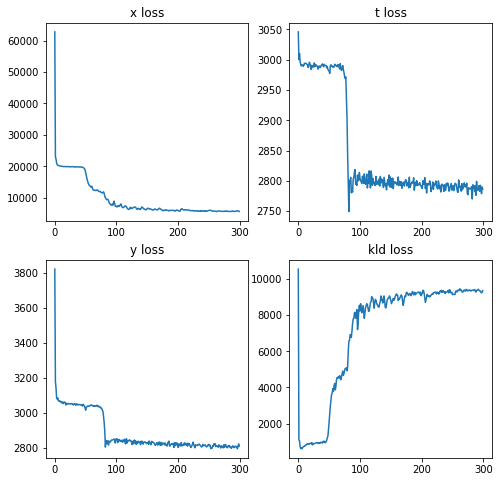

Total loss in the end:  20577.699584960938
Estimated causal effect: 0.07958632579458952 true value: [1]


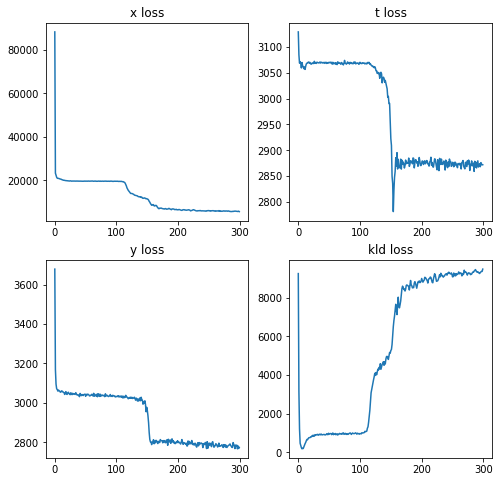

Total loss in the end:  20742.972778320312
Estimated causal effect: 0.06206300303176227 true value: [1]


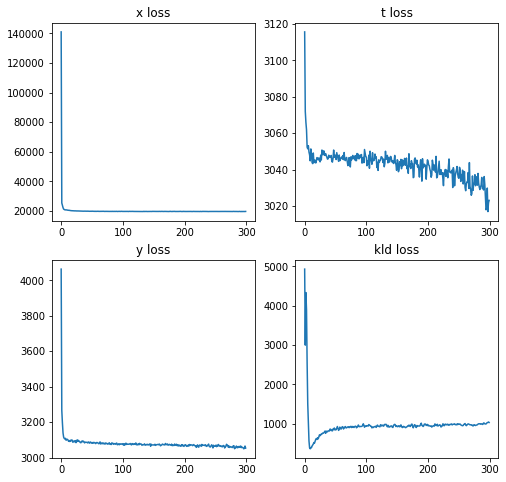

Total loss in the end:  26802.70361328125
Estimated causal effect: 0.1454117446682715 true value: [1]


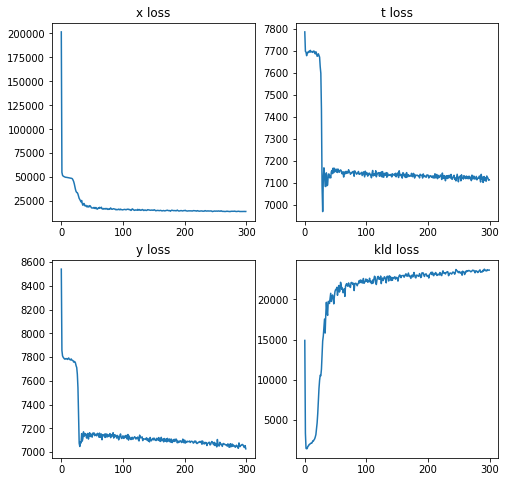

Total loss in the end:  52003.5498046875
Estimated causal effect: 0.03728795256077997 true value: [1]


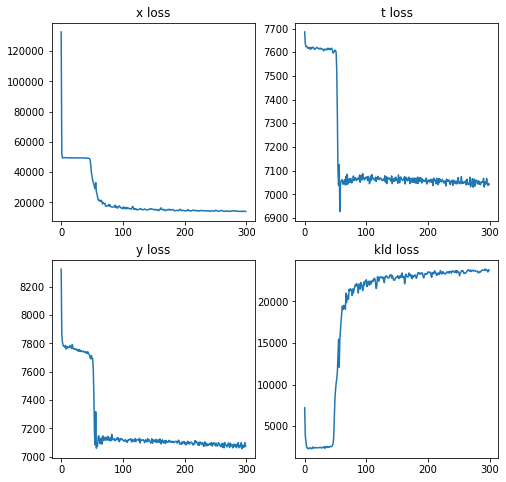

Total loss in the end:  51824.80285644531
Estimated causal effect: 0.04867786432299896 true value: [1]


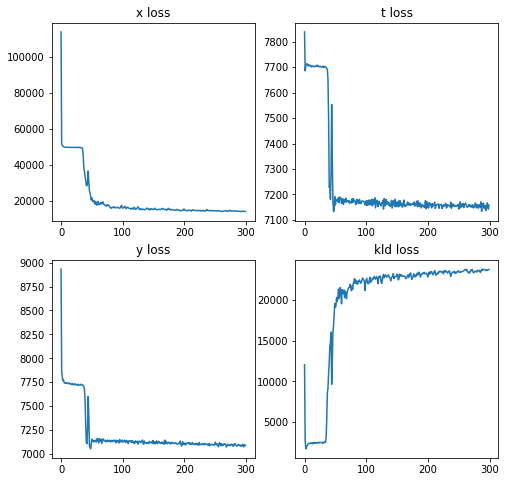

Total loss in the end:  52037.913818359375
Estimated causal effect: 0.04344168182999146 true value: [1]


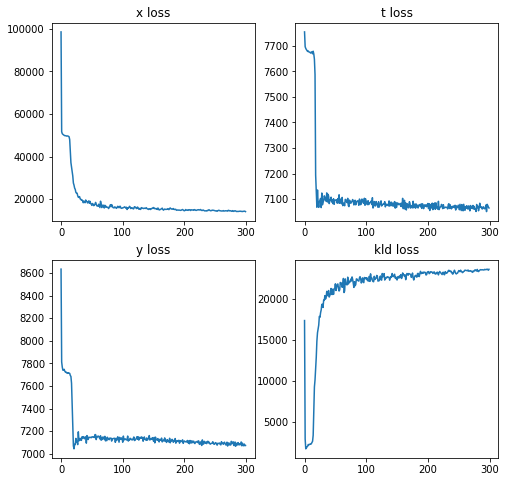

Total loss in the end:  51909.645263671875
Estimated causal effect: 0.042247378438245047 true value: [1]


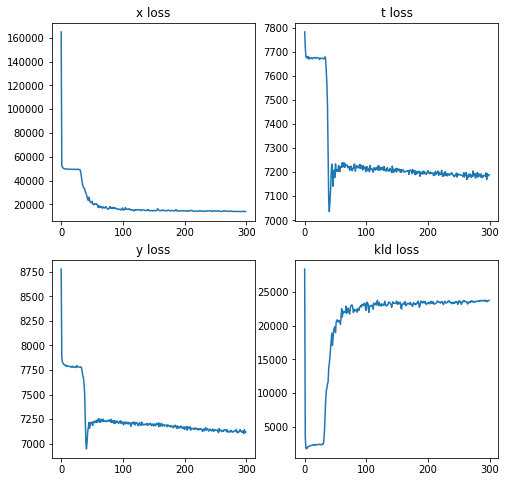

Total loss in the end:  52082.9052734375
Estimated causal effect: 0.04819463718346415 true value: [1]


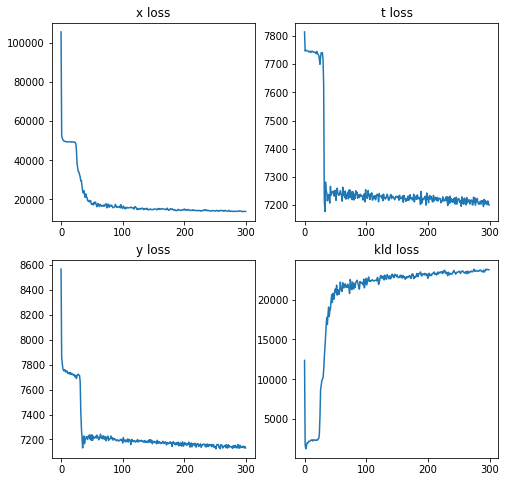

Total loss in the end:  51951.79309082031
Estimated causal effect: 0.04464670299298248 true value: [1]


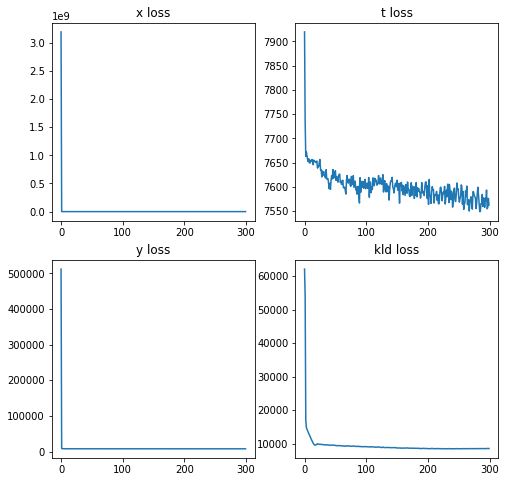

Total loss in the end:  62751.609375
Estimated causal effect: 0.126939749131013 true value: [1]


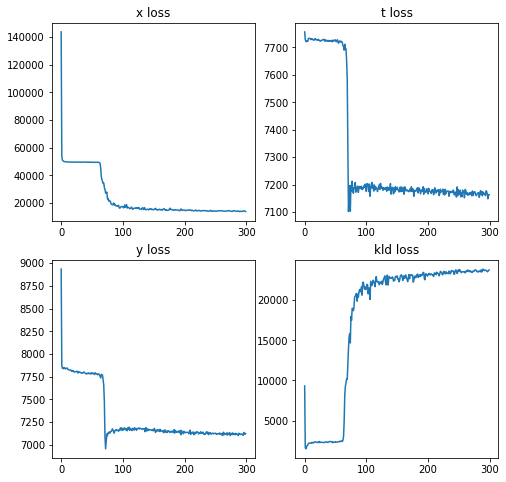

Total loss in the end:  52018.656982421875
Estimated causal effect: 0.0340120212339576 true value: [1]


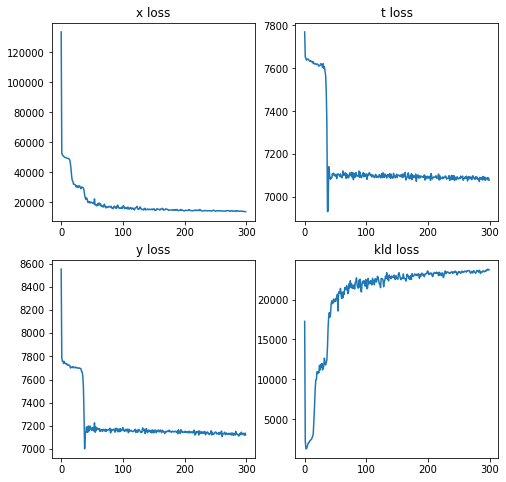

Total loss in the end:  51820.19567871094
Estimated causal effect: 0.0483228824820561 true value: [1]


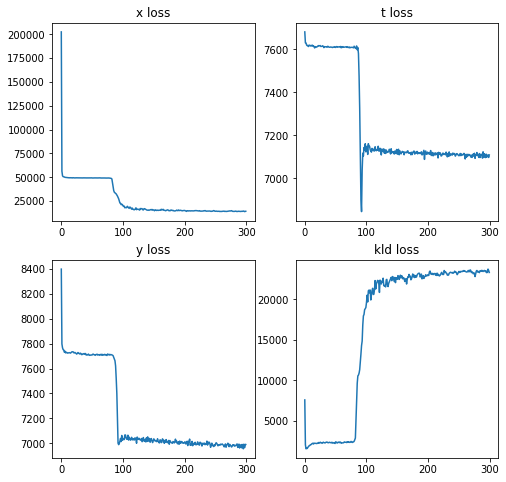

Total loss in the end:  51724.39880371094
Estimated causal effect: 0.040235375284442626 true value: [1]


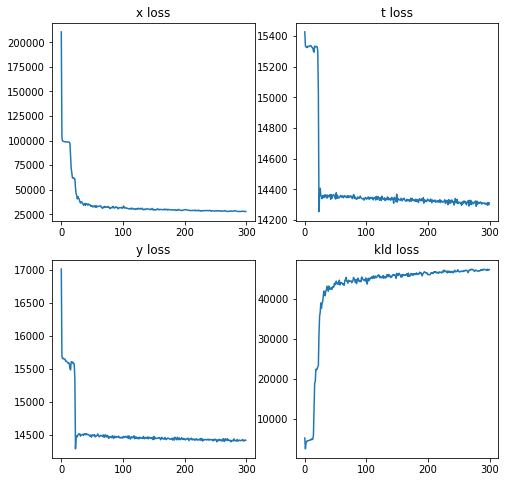

Total loss in the end:  103940.15991210938
Estimated causal effect: 0.03297595030375565 true value: [1]


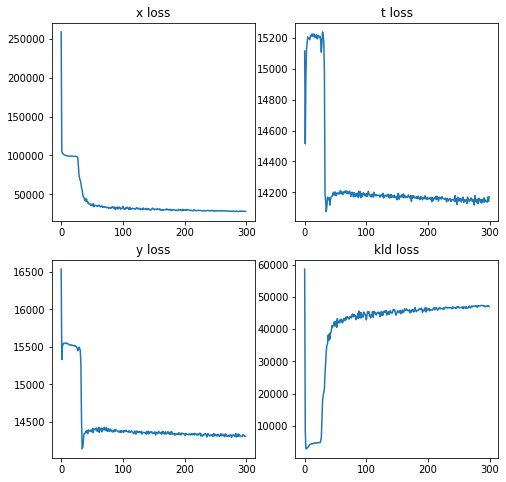

Total loss in the end:  103689.32312011719
Estimated causal effect: 0.02964946593008775 true value: [1]


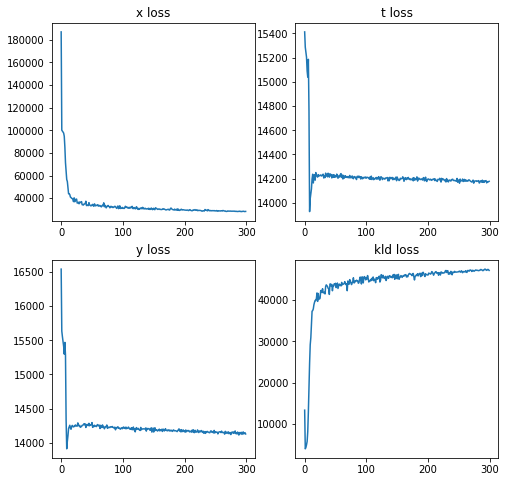

Total loss in the end:  103756.09826660156
Estimated causal effect: 0.044138223136678895 true value: [1]


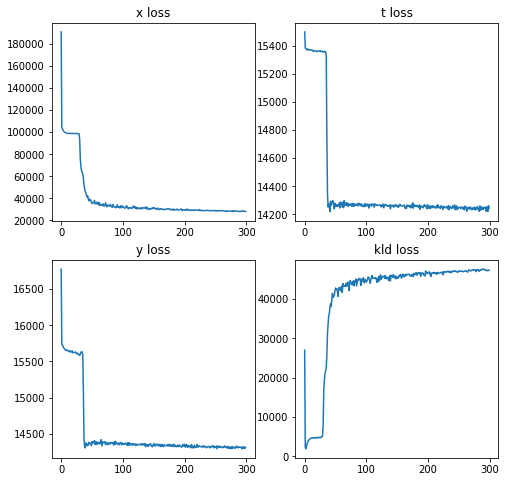

Total loss in the end:  103803.46301269531
Estimated causal effect: 0.03216269798433123 true value: [1]


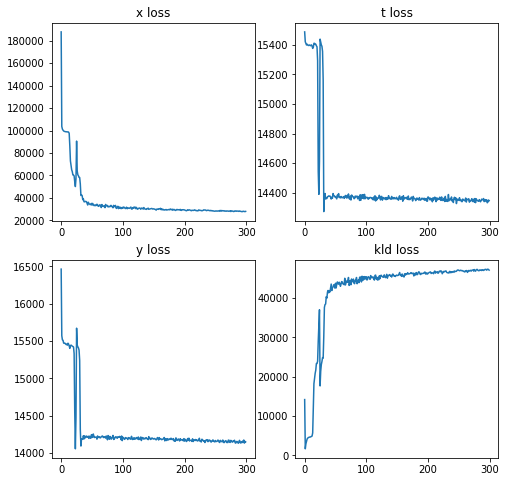

Total loss in the end:  103653.44750976562
Estimated causal effect: 0.027873481741873356 true value: [1]


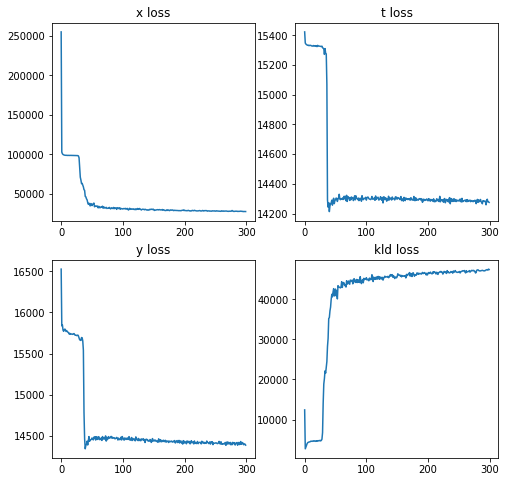

Total loss in the end:  104108.8408203125
Estimated causal effect: 0.024896687267861272 true value: [1]


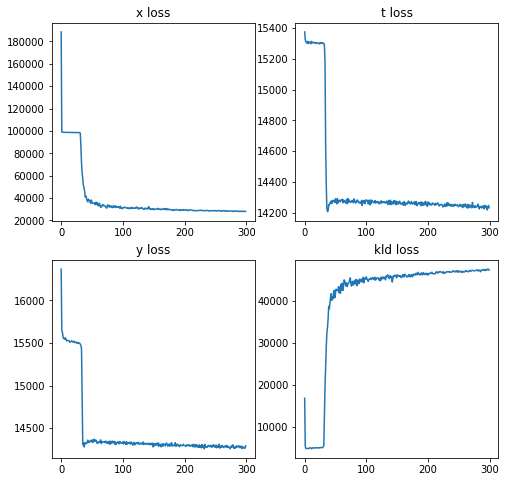

Total loss in the end:  104061.44799804688
Estimated causal effect: 0.025818746315133537 true value: [1]


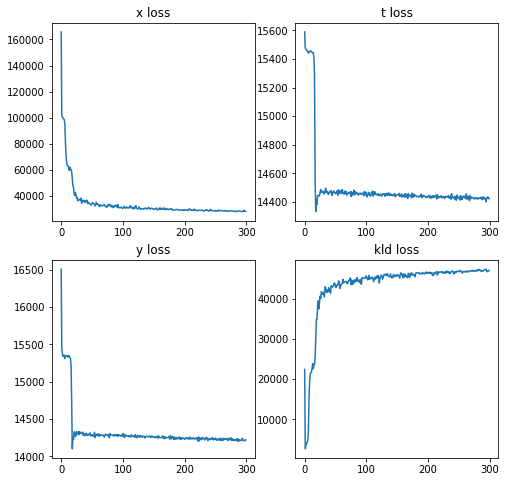

Total loss in the end:  104098.26428222656
Estimated causal effect: 0.04206522102437787 true value: [1]


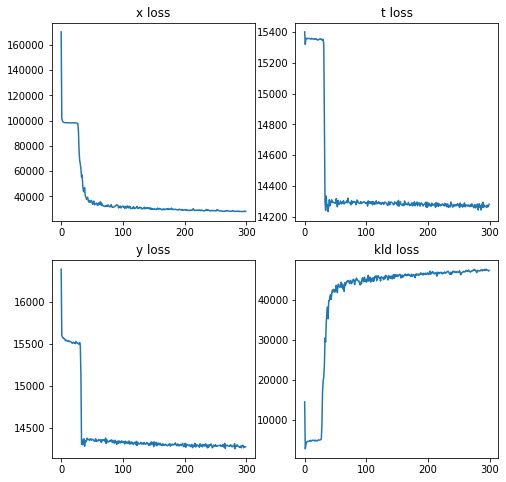

Total loss in the end:  103817.66162109375
Estimated causal effect: 0.044645415741435164 true value: [1]


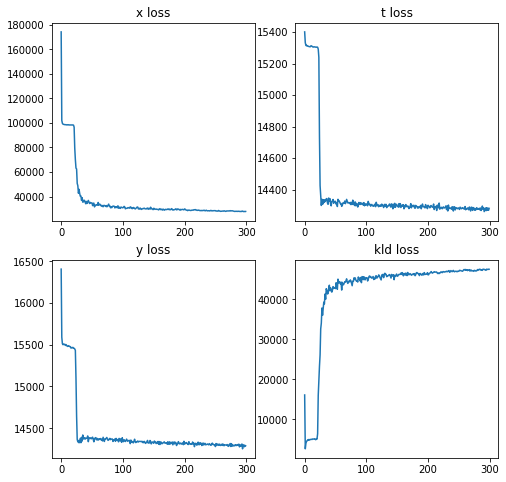

Total loss in the end:  103929.248046875
Estimated causal effect: 0.033228168621567314 true value: [1]


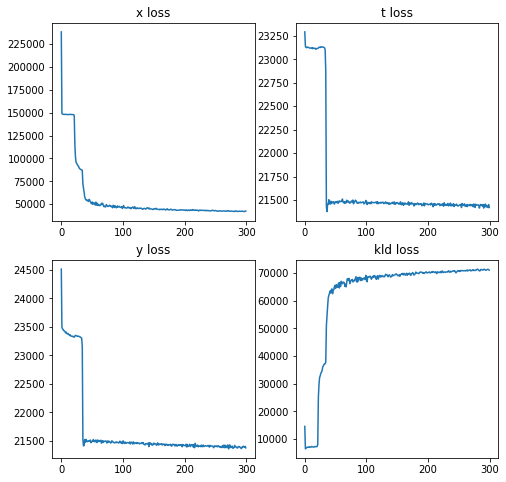

Total loss in the end:  156338.8485107422
Estimated causal effect: 0.02674544603229973 true value: [1]


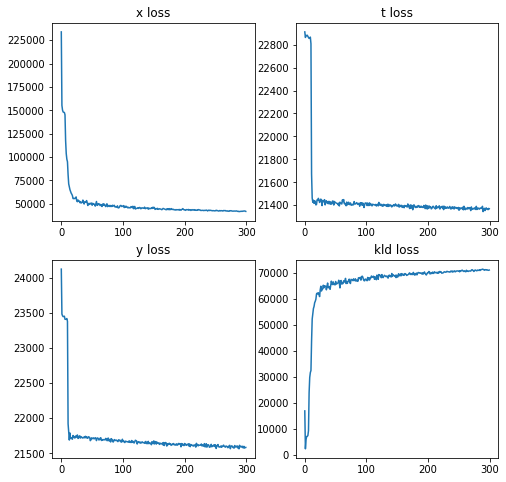

Total loss in the end:  155753.95739746094
Estimated causal effect: 0.026966727515853148 true value: [1]


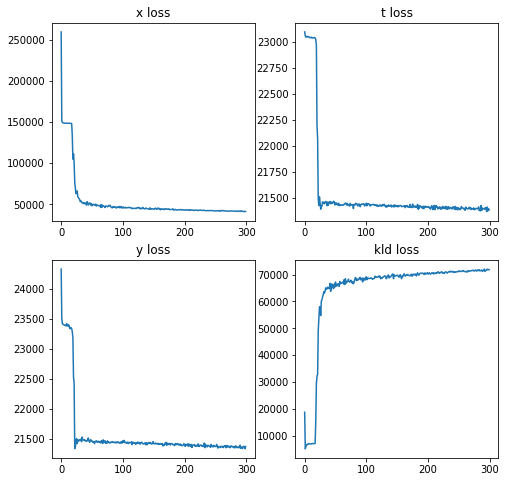

Total loss in the end:  155770.93139648438
Estimated causal effect: 0.028599598648403616 true value: [1]


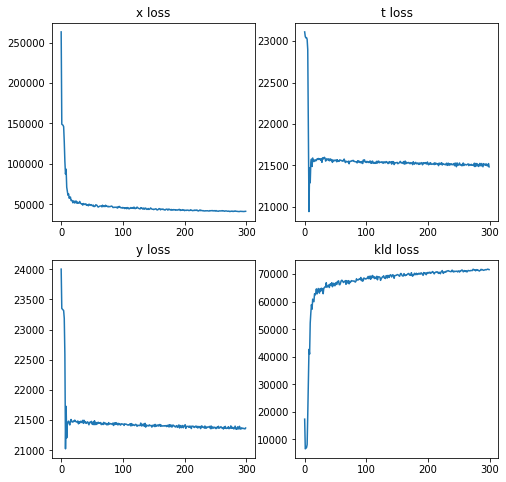

Total loss in the end:  155869.6796875
Estimated causal effect: 0.04244887675084285 true value: [1]


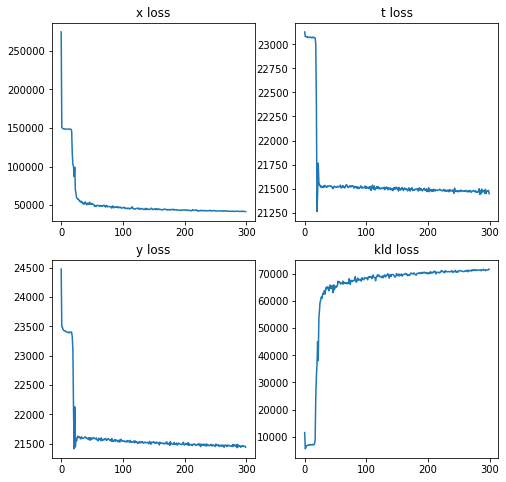

Total loss in the end:  156148.91638183594
Estimated causal effect: 0.0334796818935817 true value: [1]


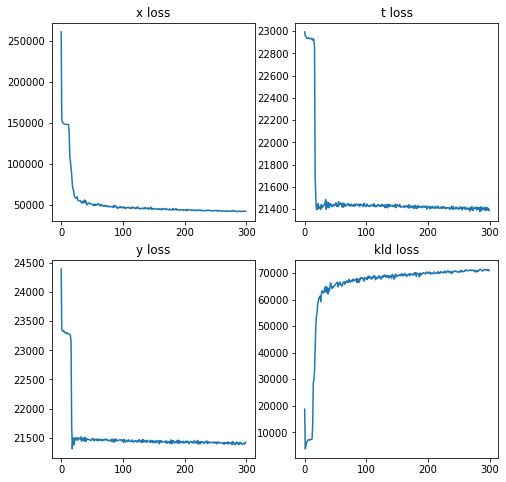

Total loss in the end:  155792.53466796875
Estimated causal effect: 0.02530796709456801 true value: [1]


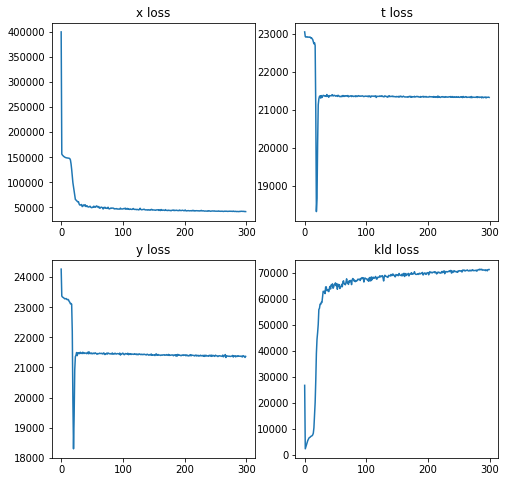

Total loss in the end:  155785.0782470703
Estimated causal effect: 0.02729827404833627 true value: [1]


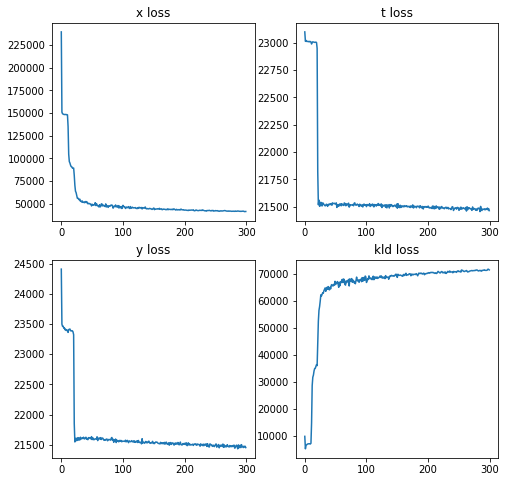

Total loss in the end:  155617.33813476562
Estimated causal effect: 0.02390546974534215 true value: [1]


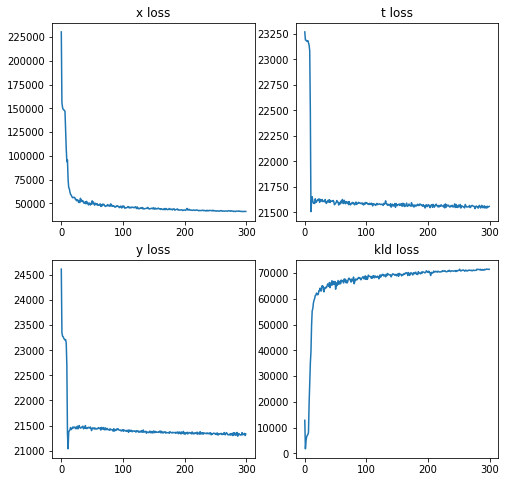

Total loss in the end:  155830.32666015625
Estimated causal effect: 0.02065794468535358 true value: [1]


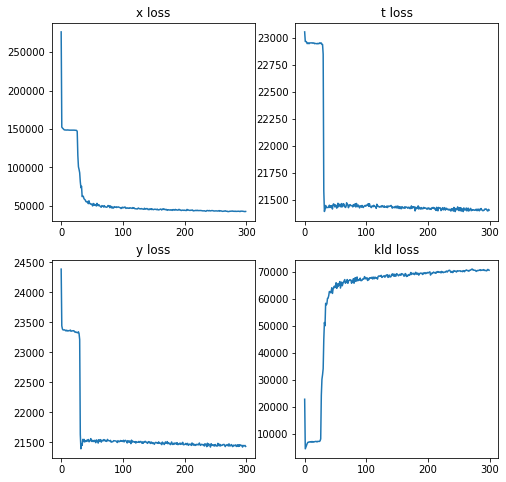

Total loss in the end:  155962.02307128906
Estimated causal effect: 0.022172812064588057 true value: [1]


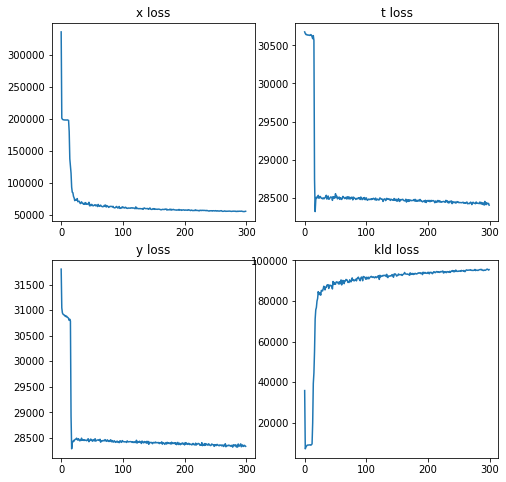

Total loss in the end:  207773.76623535156
Estimated causal effect: 0.030103134411586328 true value: [1]


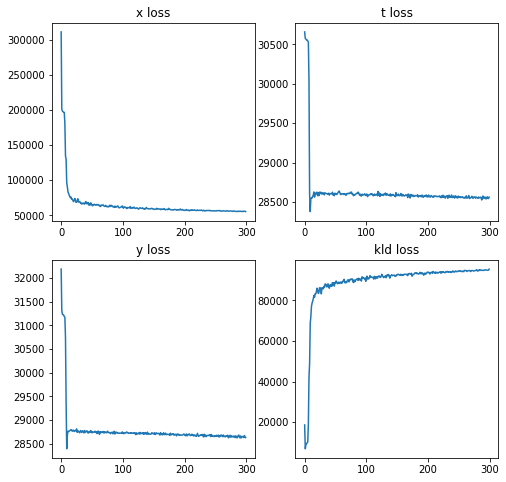

Total loss in the end:  207884.3612060547
Estimated causal effect: 0.021981339312949717 true value: [1]


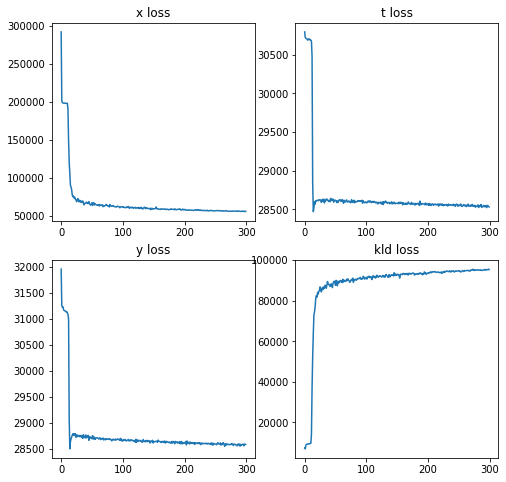

Total loss in the end:  208224.19006347656
Estimated causal effect: 0.0192532338495667 true value: [1]


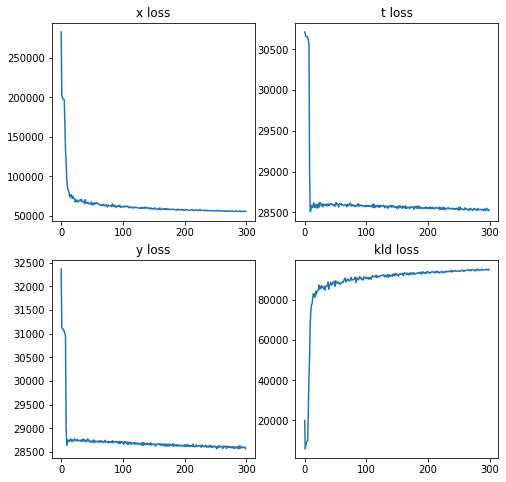

Total loss in the end:  208068.00756835938
Estimated causal effect: 0.03157195893538145 true value: [1]


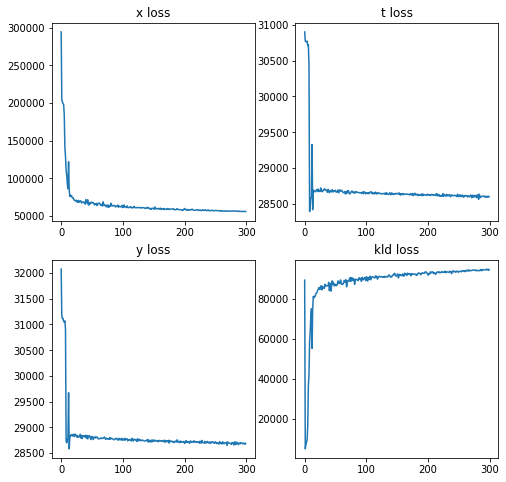

Total loss in the end:  208142.42016601562
Estimated causal effect: 0.024125624576879934 true value: [1]


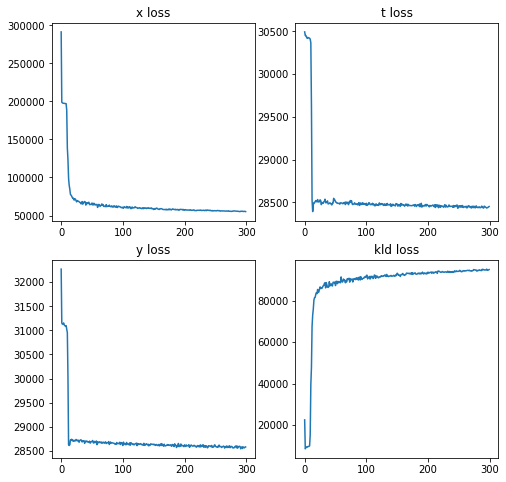

Total loss in the end:  207370.26318359375
Estimated causal effect: 0.02100727057259588 true value: [1]


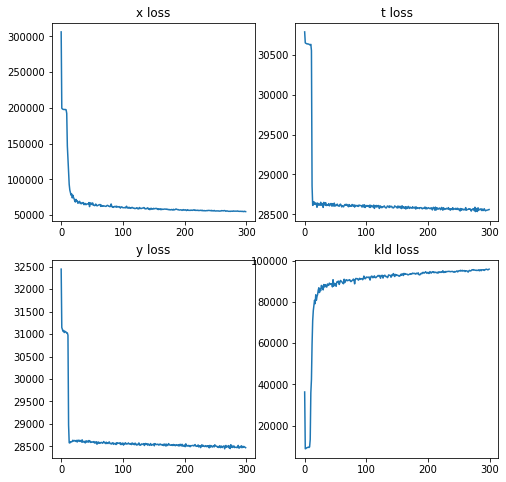

Total loss in the end:  207765.68029785156
Estimated causal effect: 0.022706740187855557 true value: [1]


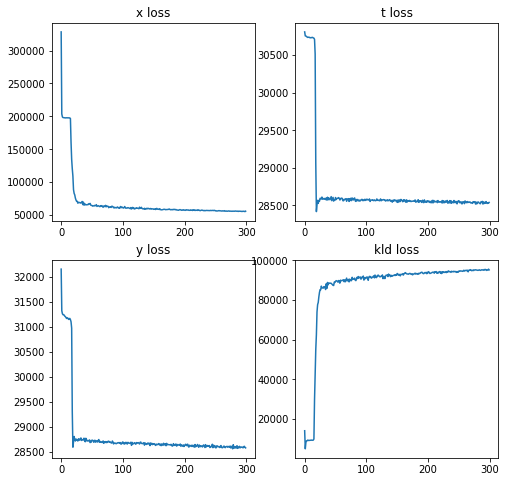

Total loss in the end:  208250.33764648438
Estimated causal effect: 0.02107627207372591 true value: [1]


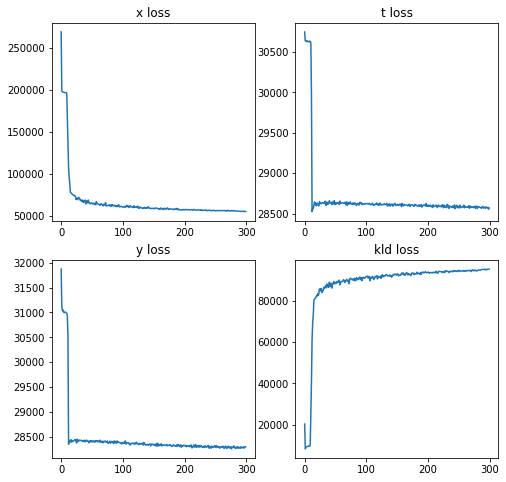

Total loss in the end:  207562.2120361328
Estimated causal effect: 0.023479289710256816 true value: [1]


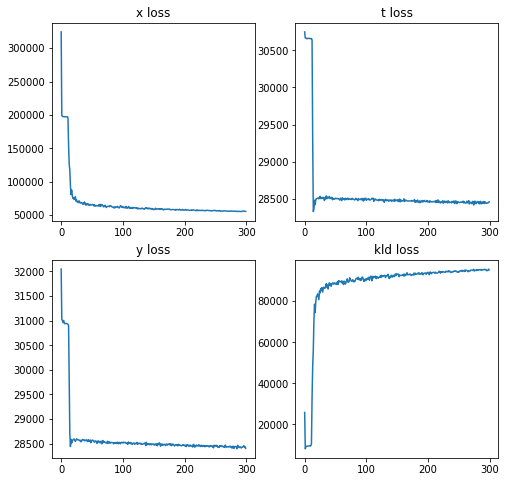

Total loss in the end:  207468.1435546875
Estimated causal effect: 0.02365012350592831 true value: [1]


In [18]:
# Run the model
models, losses = run_model_for_predef_datasets(datasets, param_times, main_folder, sub_folder_model, 
                                               BATCH_SIZE, track_function, true_value, 
                                               device, train_arguments, labels, data_labels)

# Plot results

### Load trained models

In [10]:
z_dim = 1
train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "NNzdim1500to20000"
models_zdim1, losses_zdim1 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [11]:
z_dim = 2
train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "NNzdim2500to20000"
models_zdim2, losses_zdim2 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

### Calculate AIDs

In [12]:
AIDs_zdim1 = np.zeros((param_times, len(labels)))
AIDs_zdim2 = np.zeros((param_times, len(labels)))
for i,label in enumerate(labels):
    print(label)
    for j in range(param_times):
        AIDs_zdim1[j,i] = estimate_AID_lineardata(models_zdim1[label][j],
            c_yt, c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=10000)[0]
        AIDs_zdim2[j,i] = estimate_AID_lineardata(models_zdim2[label][j],
            c_yt, c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=10000)[0]

500
1000
2000
5000
10000
15000
20000


### Plot

In [13]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"]})

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


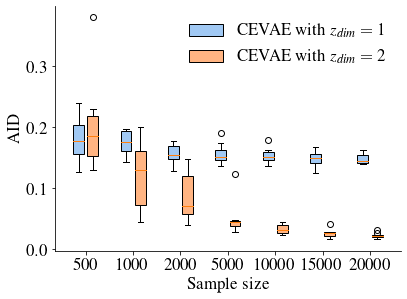

In [14]:
import seaborn as sns
fig, ax = plt.subplots(1,1,figsize=(5.5,4))
places = list(range(len(labels)))
width = 0.23
diff = 0.3
palette = sns.color_palette("pastel")
for i in range(len(labels)):
    bplot1 = plt.boxplot(AIDs_zdim1[:,i], positions=[places[i]-diff*0.5], widths=[width], patch_artist=True)
    bplot2 = plt.boxplot(AIDs_zdim2[:,i], positions=[places[i]+diff*0.5], widths=[width], patch_artist=True)
    colors = [palette[num] for num in range(2)]
    for j,bplot in enumerate([bplot1, bplot2]):
        for patch in bplot['boxes']:
            patch.set_facecolor(colors[j])
plt.xticks(places,datasize)#,labelsize=14)#CHANGED
ax.tick_params(axis='both', which='major', labelsize=17)
ax.tick_params(axis='x', which='major', rotation=0)
from matplotlib.patches import Patch
custom_lines = [Patch(facecolor=palette[i], edgecolor='black') for i in range(2)]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(custom_lines, ["CEVAE with $z_{dim}=1$","CEVAE with $z_{dim}=2$"], frameon=False, fontsize=17)
plt.tight_layout()
plt.xlabel("Sample size", fontsize=17)
plt.ylabel("AID", fontsize=17)
plt.savefig("Figures/publication/rotated_data_convergence.png", bbox_inches = 'tight', pad_inches = 0.1, dpi=200)
plt.show()